## PROBLEM STATEMENT

There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:
- Perform EDA
- Build various Models to Predict the price (Build at least 2 models and compare the results and suggest which model works better)
- Insights/Suggestions


## DATASET

1. Name : Name of the car which includes Brand name and Model name
2. Location : The location in which the car is being sold or is available for purchase Cities.
3. Year : Manufacturing year of the car
4. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
5. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
6. Transmission : The type of transmission used by the car.(Automatic / Manual)
7. Owner : Type of ownership
8. Mileage : The standard mileage offered by the car company in kmpl or km/kg
9. Engine : The displacement volume of the engine in CC.
10. Power : The maximum power of the engine in bhp.
11. Colour : The colour of the car.
12. Seats : The number of seats in the car.
13. No. of Doors : The number of doors the car have.
14. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
15. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats as stats
from scipy.stats import skew
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import warnings
warnings.filterwarnings('ignore')

## Read and Understand data

In [2]:
cars = pd.read_csv('C:\\Users\\Hitesh Kumar\\Documents\\Projects\\Cars Price Prediction\\Cars.csv')
cars.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
525,Volkswagen Polo,Hyderabad,2013.00000,76476.00000,Petrol,Manual,First,16.47 kmpl,1198 CC,73.9 bhp,White,5.00000,4.00000,NaN,4.40000
351,Maruti Alto,Coimbatore,2010.00000,48105.00000,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,White,5.00000,4.00000,NaN,3.10000
174,Maruti Swift,Kochi,2016.00000,45725.00000,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,White,5.00000,4.00000,NaN,5.34000
4775,Mini Clubman,Pune,2017.00000,8350.00000,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,White,5.00000,4.00000,44.59 Lakh,35.00000
3760,Maruti Ritz,Hyderabad,2010.00000,79324.00000,Diesel,Manual,First,21.1 kmpl,1248 CC,73.9 bhp,Black/Silver,5.00000,4.00000,NaN,3.30000


In [3]:
cars.shape

(5961, 15)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5929 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


In [5]:
cars.describe()

,Year,Kilometers_Driven,Seats,No. of Doors,Price
count,5959.00000,5953.00000,5956.00000,5960.00000,5961.00000
mean,2013.38916,58711.10012,5.26914,4.11493,9.52810
std,3.24305,91712.20717,0.78905,0.34476,11.21438
min,1998.00000,171.00000,2.00000,2.00000,0.44000
25%,2011.50000,33931.00000,5.00000,4.00000,3.50000
50%,2014.00000,53000.00000,5.00000,4.00000,5.66000
75%,2016.00000,73000.00000,5.00000,4.00000,10.00000
max,2019.00000,6500000.00000,10.00000,5.00000,160.00000


## Data Preprocessing

In [6]:
#converting engine, power, mileage columns from object datatype to int datatype

cars[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
2369,1496 CC,88.73 bhp,16.78 kmpl
3890,1248 CC,74 bhp,26.59 kmpl
5036,1248 CC,88.5 bhp,25.1 kmpl
902,1498 CC,97.6 bhp,16.95 kmpl
2021,1197 CC,81.86 bhp,17.19 kmpl
1115,1586 CC,103.3 bhp,21.4 km/kg
1720,799 CC,53.3 bhp,25.17 kmpl
94,1968 CC,138.1 bhp,19.33 kmpl
2028,1120 CC,71 bhp,24.4 kmpl
1453,2967 CC,241.4 bhp,13.22 kmpl


In [7]:
typeoffuel = ['CNG','LPG']
cars.loc[cars.Fuel_Type.isin(typeoffuel)].head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
167,Maruti Wagon,Delhi,2013.00000,62000.00000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,White,5.00000,4.00000,NaN,2.80000
412,Maruti Wagon,Delhi,2014.00000,74663.00000,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,Black/Silver,5.00000,4.00000,5.35 Lakh,3.25000
504,Maruti Wagon,Mumbai,2008.00000,64226.00000,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,Others,5.00000,4.00000,NaN,1.45000
658,Maruti Wagon,Delhi,2014.00000,48500.00000,CNG,Manual,Second,26.6 km/kg,998 CC,58.16 bhp,Others,5.00000,4.00000,NaN,2.85000
742,Maruti Alto,Delhi,2012.00000,65537.00000,CNG,Manual,First,26.83 km/kg,796 CC,38.4 bhp,Others,5.00000,4.00000,NaN,2.10000
915,Maruti Eeco,Ahmedabad,2015.00000,47001.00000,CNG,Manual,First,20.0 km/kg,1196 CC,63 bhp,White,5.00000,4.00000,5.36 Lakh,3.72000
970,Tata Indigo,Chennai,2015.00000,75000.00000,CNG,Manual,First,24.6 km/kg,1193 CC,55.23 bhp,Black/Silver,5.00000,4.00000,NaN,3.25000
1115,Maruti SX4,Delhi,2012.00000,82069.00000,CNG,Manual,First,21.4 km/kg,1586 CC,103.3 bhp,Others,5.00000,4.00000,NaN,2.65000
1154,Maruti Wagon,Hyderabad,2007.00000,65047.00000,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,Others,5.00000,4.00000,NaN,1.95000
1215,Maruti Alto,Kochi,2017.00000,24310.00000,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,Black/Silver,4.00000,4.00000,NaN,3.70000


Power has some values as "nullbhp" .Mileage also has some observations as 0. For fuel type and CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since those units are in km for both of them no need of conversion . Dropping units from mileages,Engine and Power.

In [8]:
cars[cars.Mileage.isnull()==True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
4027,Toyota Prius,Mumbai,2011.00000,44000.00000,Electric,Automatic,First,NaN,1798 CC,73 bhp,Others,5.00000,4.00000,NaN,12.75000
5242,Mahindra E,Chennai,2016.00000,50000.00000,Electric,Automatic,First,NaN,72 CC,41 bhp,White,5.00000,4.00000,13.58 Lakh,13.00000


In [9]:
cars['Mileage'] = cars['Mileage'].str.rstrip(" kmpl")
cars['Mileage'] = cars['Mileage'].str.rstrip(" km/kg")

In [10]:
cars['Engine'] = cars['Engine'].str.rstrip(" CC")

In [11]:
cars['Power'] = cars['Power'].str.rstrip(" bhp")
cars['Power'] = cars['Power'].replace(regex='null', value = np.nan)

In [12]:
#verify data
num=['Engine','Power','Mileage']
cars[num].sample(20)

,Engine,Power,Mileage
711,1968,167.7,18.33
3820,1199,73.9,22.07
4428,2494,102,12.8
4763,1591,121.3,13.0
932,1798,189,17.21
5349,2179,140,16.0
3693,1248,88.76,20.77
3103,1582,126.32,19.08
2273,1984,132,10.8
4788,1461,108.45,19.01


checking for values containing 0.0 and replacing them by NAN

In [13]:
cars.query("Power == '0.0'")['Power'].count()

0

In [14]:
cars.query("Mileage == '0.0'")['Mileage'].count()

56

In [15]:
cars.loc[cars['Mileage']=='0.0', 'Mileage']=np.nan

In [16]:
cars.loc[cars['Engine']=='0.0', 'Engine'].count()

0

In [17]:
cars[num].nunique()

Engine     143
Power      368
Mileage    426
dtype: int64

In [18]:
cars[num].isnull().sum()

Engine      17
Power      135
Mileage     58
dtype: int64

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5903 non-null   object 
 8   Engine             5944 non-null   object 
 9   Power              5826 non-null   object 
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    object 
 14  Price              5961 non-null   float64
dtypes: float64(5), object(10)
memory usage: 698.7+ KB


In [20]:
cars['Seats'].isnull().sum()

5

In [21]:
cars['Seats']=cars.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [22]:
cars['Seats'].isnull().sum()

0

### Processing New Price

We know that New_Price is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

This column clearly has a lot of missing values. We will impute the missing values later. For now we will only extract the numeric values from this column.

In [23]:
# Create a new column after splitting the New_Price values.
import re

new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in cars["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing.mismatch ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The data needs furthur processing.mismatch  1.27 Cr
The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  1.13 Cr
The data needs furthur processing.mismatch  1.4 Cr
The data needs furthur processing.mismatch  1.66 Cr
The data needs furthur processing.mismatch  1.6 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.28 Cr
The data needs furthur processing.mismatch  1.06 Cr
The data needs furthur processing.mismatch  1 Cr
The data needs furthur processing.mismatch  1.71 Cr
The data needs furthur processing.mismatch  1.04 Cr
The data needs furthur processing.mismatch  1.02 Cr
The data needs furthur processing.mismatch  2.3 Cr
The data needs furthur processing.mismatch  1.36 Cr
The data needs furthur processing.mismatch  1.39 Cr
The data needs furthur processing.mismatch  1.04 Cr


In [24]:
new_price_num = []

for observation in cars["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
cars["new_price_num"] = new_price_num

# Checking the new dataframe
cars.head(5) 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,new_price_num
0,Mahindra Scorpio,Pune,2012.00000,99000.00000,Diesel,Manual,Third,12.05,2179,120,Black/Silver,8.00000,5.00000,NaN,6.00000,NaN
1,Maruti Baleno,Kochi,2018.00000,18678.00000,Petrol,Manual,First,21.1,998,100,Others,5.00000,4.00000,NaN,8.32000,NaN
2,Mahindra Xylo,Bangalore,2013.00000,197000.00000,Diesel,Manual,First,11.68,2498,112,White,7.00000,5.00000,NaN,4.00000,NaN
3,Hyundai Grand,Delhi,2014.00000,45000.00000,Diesel,Manual,First,24.0,1120,70,White,5.00000,4.00000,NaN,3.49000,NaN
4,Toyota Innova,Delhi,2011.00000,65000.00000,Diesel,Manual,First,12.8,2494,102,Others,8.00000,5.00000,NaN,6.40000,NaN


# Feature Engineering

## Converting Datatype

In [25]:
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
cars["Mileage"] = cars["Mileage"].astype('float')
cars["Power"] = cars["Power"].astype('float')
cars["Engine"]=cars["Engine"].astype('float')

In [26]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5959.00000,2013.38916,3.24305,1998.00000,2011.50000,2014.00000,2016.00000,2019.00000
Kilometers_Driven,5953.00000,58711.10012,91712.20717,171.00000,33931.00000,53000.00000,73000.00000,6500000.00000
Mileage,5903.00000,18.35701,4.18322,6.40000,15.30000,18.20000,21.10000,33.54000
Engine,5944.00000,1622.55299,601.68967,72.00000,1198.00000,1493.00000,1984.00000,5998.00000
Power,5826.00000,113.43411,53.93572,34.20000,75.00000,98.14500,138.10000,560.00000
Seats,5961.00000,5.26891,0.78876,2.00000,5.00000,5.00000,5.00000,10.00000
No. of Doors,5960.00000,4.11493,0.34476,2.00000,4.00000,4.00000,4.00000,5.00000
Price,5961.00000,9.52810,11.21438,0.44000,3.50000,5.66000,10.00000,160.00000
new_price_num,824.00000,23.07566,26.18241,3.91000,7.97750,11.67000,26.56000,230.00000


In [27]:
#Processing Years to derive age of car

cars['Current_year']=2023
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,new_price_num,Ageofcar
0,Mahindra Scorpio,Pune,2012.00000,99000.00000,Diesel,Manual,Third,12.05000,2179.00000,120.00000,Black/Silver,8.00000,5.00000,NaN,6.00000,NaN,11.00000
1,Maruti Baleno,Kochi,2018.00000,18678.00000,Petrol,Manual,First,21.10000,998.00000,100.00000,Others,5.00000,4.00000,NaN,8.32000,NaN,5.00000
2,Mahindra Xylo,Bangalore,2013.00000,197000.00000,Diesel,Manual,First,11.68000,2498.00000,112.00000,White,7.00000,5.00000,NaN,4.00000,NaN,10.00000
3,Hyundai Grand,Delhi,2014.00000,45000.00000,Diesel,Manual,First,24.00000,1120.00000,70.00000,White,5.00000,4.00000,NaN,3.49000,NaN,9.00000
4,Toyota Innova,Delhi,2011.00000,65000.00000,Diesel,Manual,First,12.80000,2494.00000,102.00000,Others,8.00000,5.00000,NaN,6.40000,NaN,12.00000


Processing Name Column

In [28]:
#Extracting brand name from Names column
cars[['Brand', 'Model']] = cars['Name'].str.split(n=1, expand=True)

In [29]:
cars.Brand.unique()

array(['Mahindra', 'Maruti', 'Hyundai', 'Toyota', 'Honda', 'Chevrolet',
       'Audi', 'Skoda', 'Renault', 'Land', 'BMW', 'ISUZU', 'Jaguar',
       'Mercedes-Benz', 'Volkswagen', 'Tata', 'Mitsubishi', 'Ford',
       'Nissan', 'Volvo', 'Fiat', 'Porsche', 'Mini', 'Datsun', 'Jeep',
       'Force', 'Isuzu', 'Smart', 'Lamborghini', 'Bentley'], dtype=object)

In [30]:
col=['ISUZU','Isuzu','Mini','Land']
cars[cars.Brand.isin(col)].sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,new_price_num,Ageofcar,Brand,Model
2148,Land Rover Freelander,Delhi,2013.00000,68000.00000,Diesel,Automatic,Second,12.39000,2179.00000,147.51000,White,5.00000,4.00000,NaN,15.75000,NaN,10.00000,Land,Rover Freelander
3833,Land Rover Range,Delhi,2014.00000,38999.00000,Diesel,Automatic,First,12.70000,2179.00000,187.70000,White,5.00000,4.00000,NaN,32.50000,NaN,9.00000,Land,Rover Range
5643,Land Rover Freelander,Bangalore,2010.00000,125000.00000,Diesel,Automatic,Second,NaN,2179.00000,115.00000,Others,5.00000,4.00000,NaN,11.00000,NaN,13.00000,Land,Rover Freelander
3069,Mini Cooper,Chennai,2012.00000,17000.00000,Petrol,Automatic,Second,16.82000,1998.00000,189.08000,Black/Silver,4.00000,4.00000,44.28 Lakh,22.00000,44.28000,11.00000,Mini,Cooper
3613,Land Rover Freelander,Hyderabad,2012.00000,96000.00000,Diesel,Automatic,First,12.35000,2179.00000,187.74000,Others,5.00000,4.00000,NaN,18.98000,NaN,11.00000,Land,Rover Freelander


Brand names like ISUZU and Isuzu are same and needs to be corrected. Land, Mini seems to be incorrect. So correcting brand names.

In [31]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5961 non-null   object  
 1   Location           5950 non-null   object  
 2   Year               5959 non-null   float64 
 3   Kilometers_Driven  5953 non-null   float64 
 4   Fuel_Type          5961 non-null   category
 5   Transmission       5934 non-null   category
 6   Owner_Type         5946 non-null   category
 7   Mileage            5903 non-null   float64 
 8   Engine             5944 non-null   float64 
 9   Power              5826 non-null   float64 
 10  Colour             5950 non-null   object  
 11  Seats              5961 non-null   float64 
 12  No. of Doors       5960 non-null   float64 
 13  New_Price          824 non-null    object  
 14  Price              5961 non-null   float64 
 15  new_price_num      824 non-null    float64 
 16  Ageofc

In [32]:
#changing brand names
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'

In [33]:
cars.Brand.nunique()

29

In [34]:
cars.groupby(cars.Brand).size().sort_values(ascending =False)

Brand
Maruti           1189
Hyundai          1100
Honda             601
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land Rover         57
Jaguar             40
Mitsubishi         27
Mini Cooper        26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Lamborghini         1
Smart               1
Bentley             1
dtype: int64

There are 29 unique Brands in the dataset.Maruti brand is most available for purchase/Sold followed by Hyundai.

In [35]:
cars.Model.isnull().sum()

0

In [36]:
cars.Model.nunique()

209

In [37]:
cars.groupby('Model')['Model'].size().nlargest(30)

Model
Swift       343
City        265
i20         247
Verna       170
Innova      164
Grand       156
i10         156
Wagon       153
Polo        151
Alto        143
XUV500      113
Vento       107
Amaze       106
New         102
Fortuner    101
Figo        100
3            98
Creta        93
E-Class      88
Duster       83
A4           78
Ertiga       75
Ciaz         71
Santro       71
5            68
Corolla      68
Ritz         64
Baleno       63
EON          61
Scorpio      61
Name: Model, dtype: int64

## EDA

In [38]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5961 non-null   object  
 1   Location           5950 non-null   object  
 2   Year               5959 non-null   float64 
 3   Kilometers_Driven  5953 non-null   float64 
 4   Fuel_Type          5961 non-null   category
 5   Transmission       5934 non-null   category
 6   Owner_Type         5946 non-null   category
 7   Mileage            5903 non-null   float64 
 8   Engine             5944 non-null   float64 
 9   Power              5826 non-null   float64 
 10  Colour             5950 non-null   object  
 11  Seats              5961 non-null   float64 
 12  No. of Doors       5960 non-null   float64 
 13  New_Price          824 non-null    object  
 14  Price              5961 non-null   float64 
 15  new_price_num      824 non-null    float64 
 16  Ageofc

In [39]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,Price,new_price_num,Ageofcar
count,5959.00000,5953.00000,5903.00000,5944.00000,5826.00000,5961.00000,5960.00000,5961.00000,824.00000,5959.00000
mean,2013.38916,58711.10012,18.35701,1622.55299,113.43411,5.26891,4.11493,9.52810,23.07566,9.61084
std,3.24305,91712.20717,4.18322,601.68967,53.93572,0.78876,0.34476,11.21438,26.18241,3.24305
min,1998.00000,171.00000,6.40000,72.00000,34.20000,2.00000,2.00000,0.44000,3.91000,4.00000
25%,2011.50000,33931.00000,15.30000,1198.00000,75.00000,5.00000,4.00000,3.50000,7.97750,7.00000
50%,2014.00000,53000.00000,18.20000,1493.00000,98.14500,5.00000,4.00000,5.66000,11.67000,9.00000
75%,2016.00000,73000.00000,21.10000,1984.00000,138.10000,5.00000,4.00000,10.00000,26.56000,11.50000
max,2019.00000,6500000.00000,33.54000,5998.00000,560.00000,10.00000,5.00000,160.00000,230.00000,25.00000


### Observations

- Years is left skewed. Years ranges from 1998- 2019 . Age of cars 2 year old to 25 years old
- Kilometer driven , median is ~53k Km and mean is ~58K. Max values seems to be 6500000. This is very high , and seems to be outlier. Need to analyze further.
- Mileage is almost Normally distrubuited
- Engine is right skewed and has outliers on higher and lower end
- Power and Price are also right skewed.
- Price 160 Lakh is too much for a used car. Seems to be an outlier

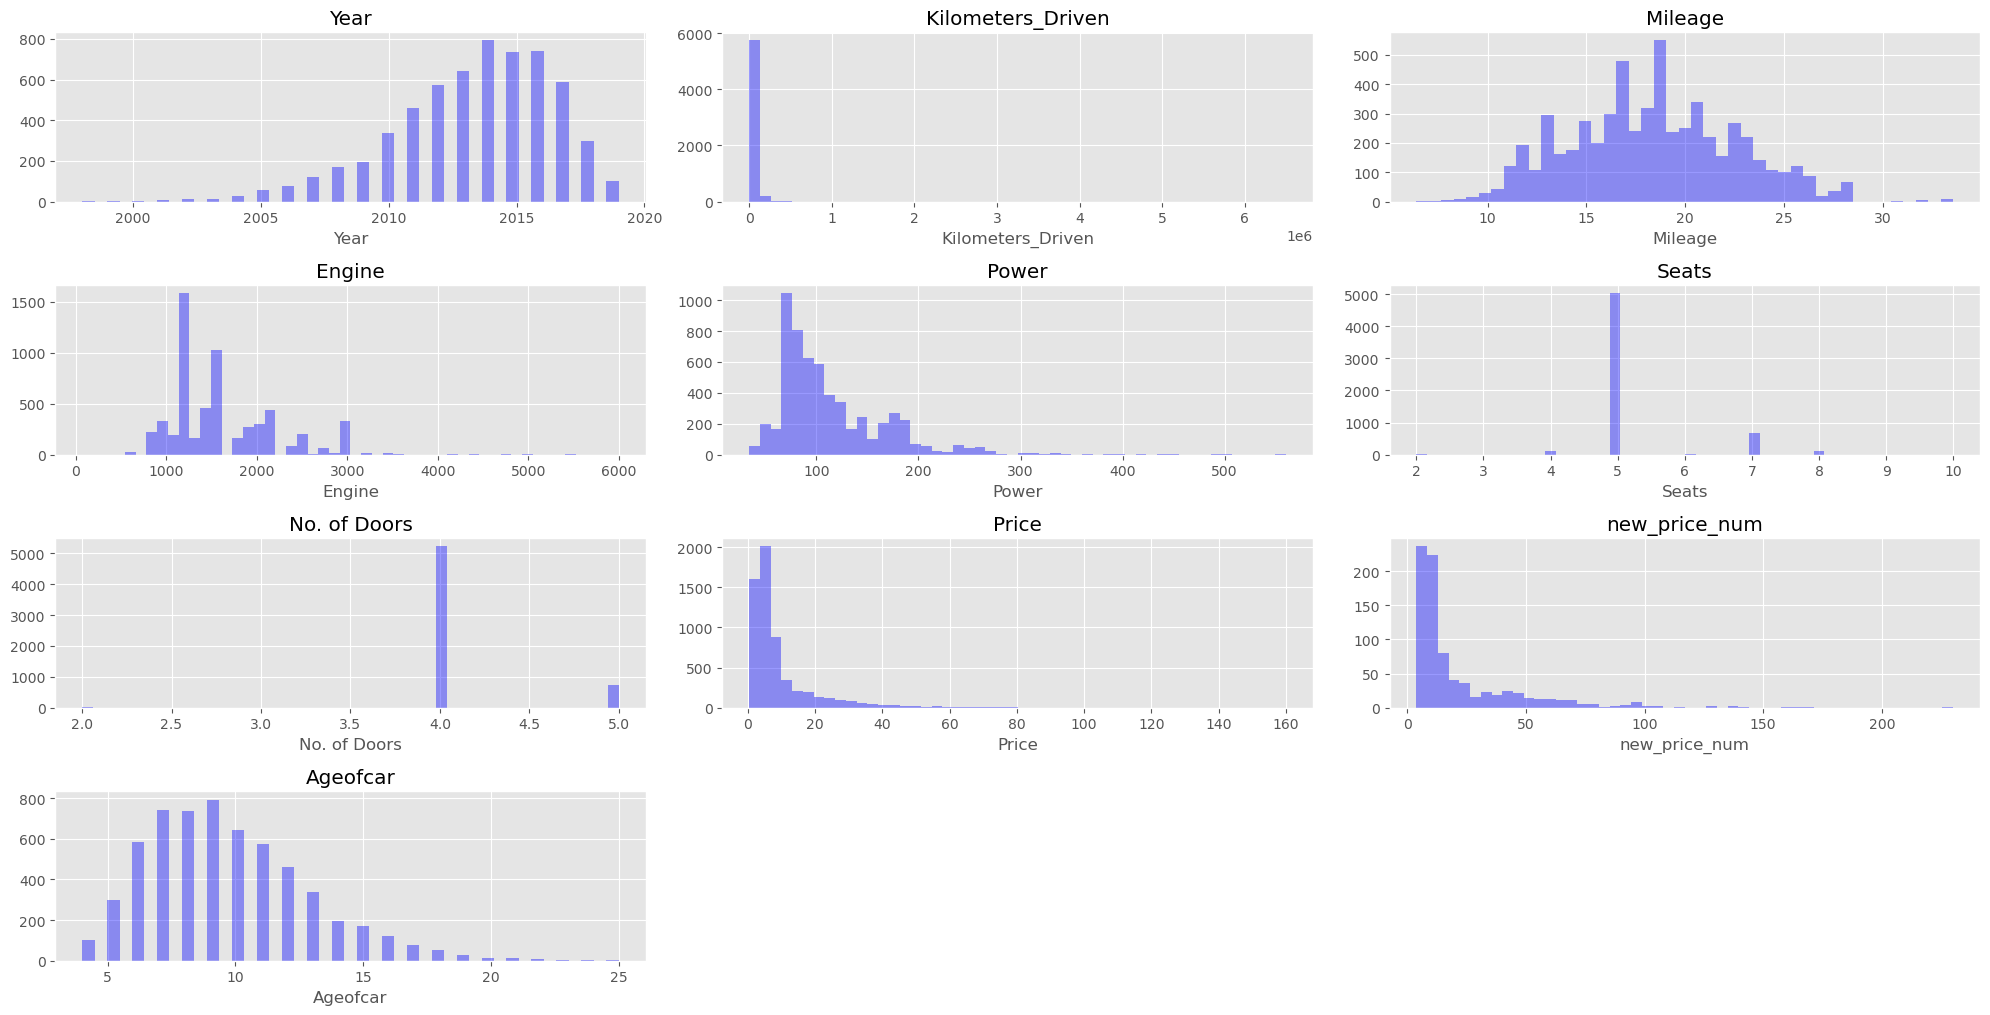

In [40]:
plt.style.use('ggplot')
#select all quantitative columns for checking the spread
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(10,3,i+1)
                       
                     sns.distplot(cars[variable],kde=False,color='blue')
                     plt.tight_layout()
                     plt.title(variable)

### Observations

- Year is left skewed and has outilers on lower side, This column can be dropped.
- Kilometer_driven is right skewed.
- Mileage is almost Normally distributed. Has few outliers on upper and lower side, need to check further.
- Engine ,power and price are right skewed and has outliers on upper side.
- Age of car is right skewed.

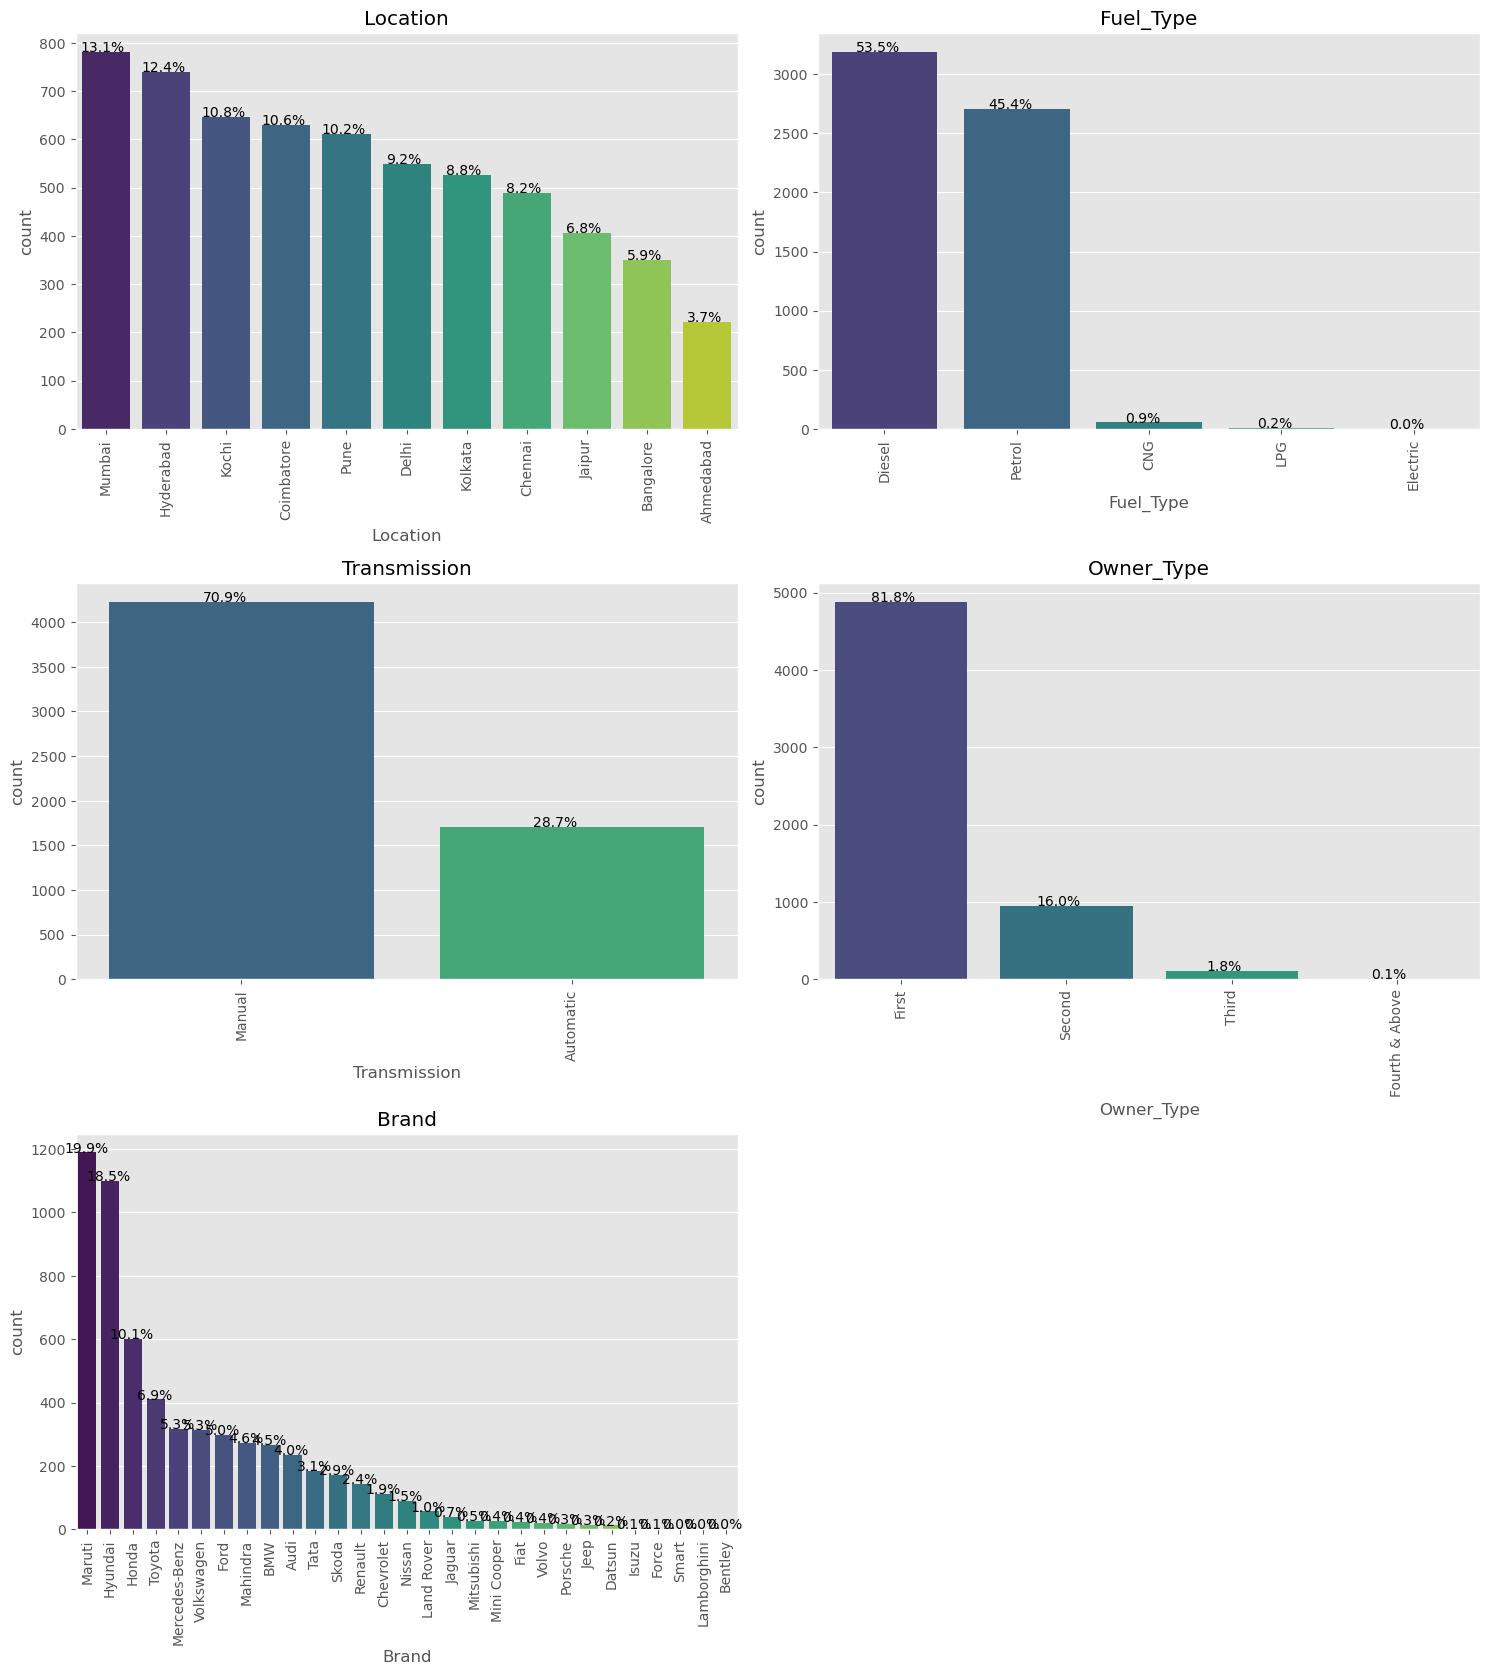

In [41]:
#cars.select_dtypes(exclude=np.number).columns.tolist()
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand']
plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cars[variable], data=cars , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

### Observations

#### Car Profile

- ~71 % cars available for sell have manual Transmission.
- ~82 % cars are First owned cars.
- ~39% of car available for sale are from Maruti & Hyundai brands.
- ~53% of car being sold/avialable for purchase have fuel type as Diesel .
- Mumbai has highest numbers of car availabe for purchase whereas Ahmedabad has least
- Most of the cars are 5 seaters.
- Car being sold/available for purchase are in 4 - 25 years old
- ~71% car are lower price range car.

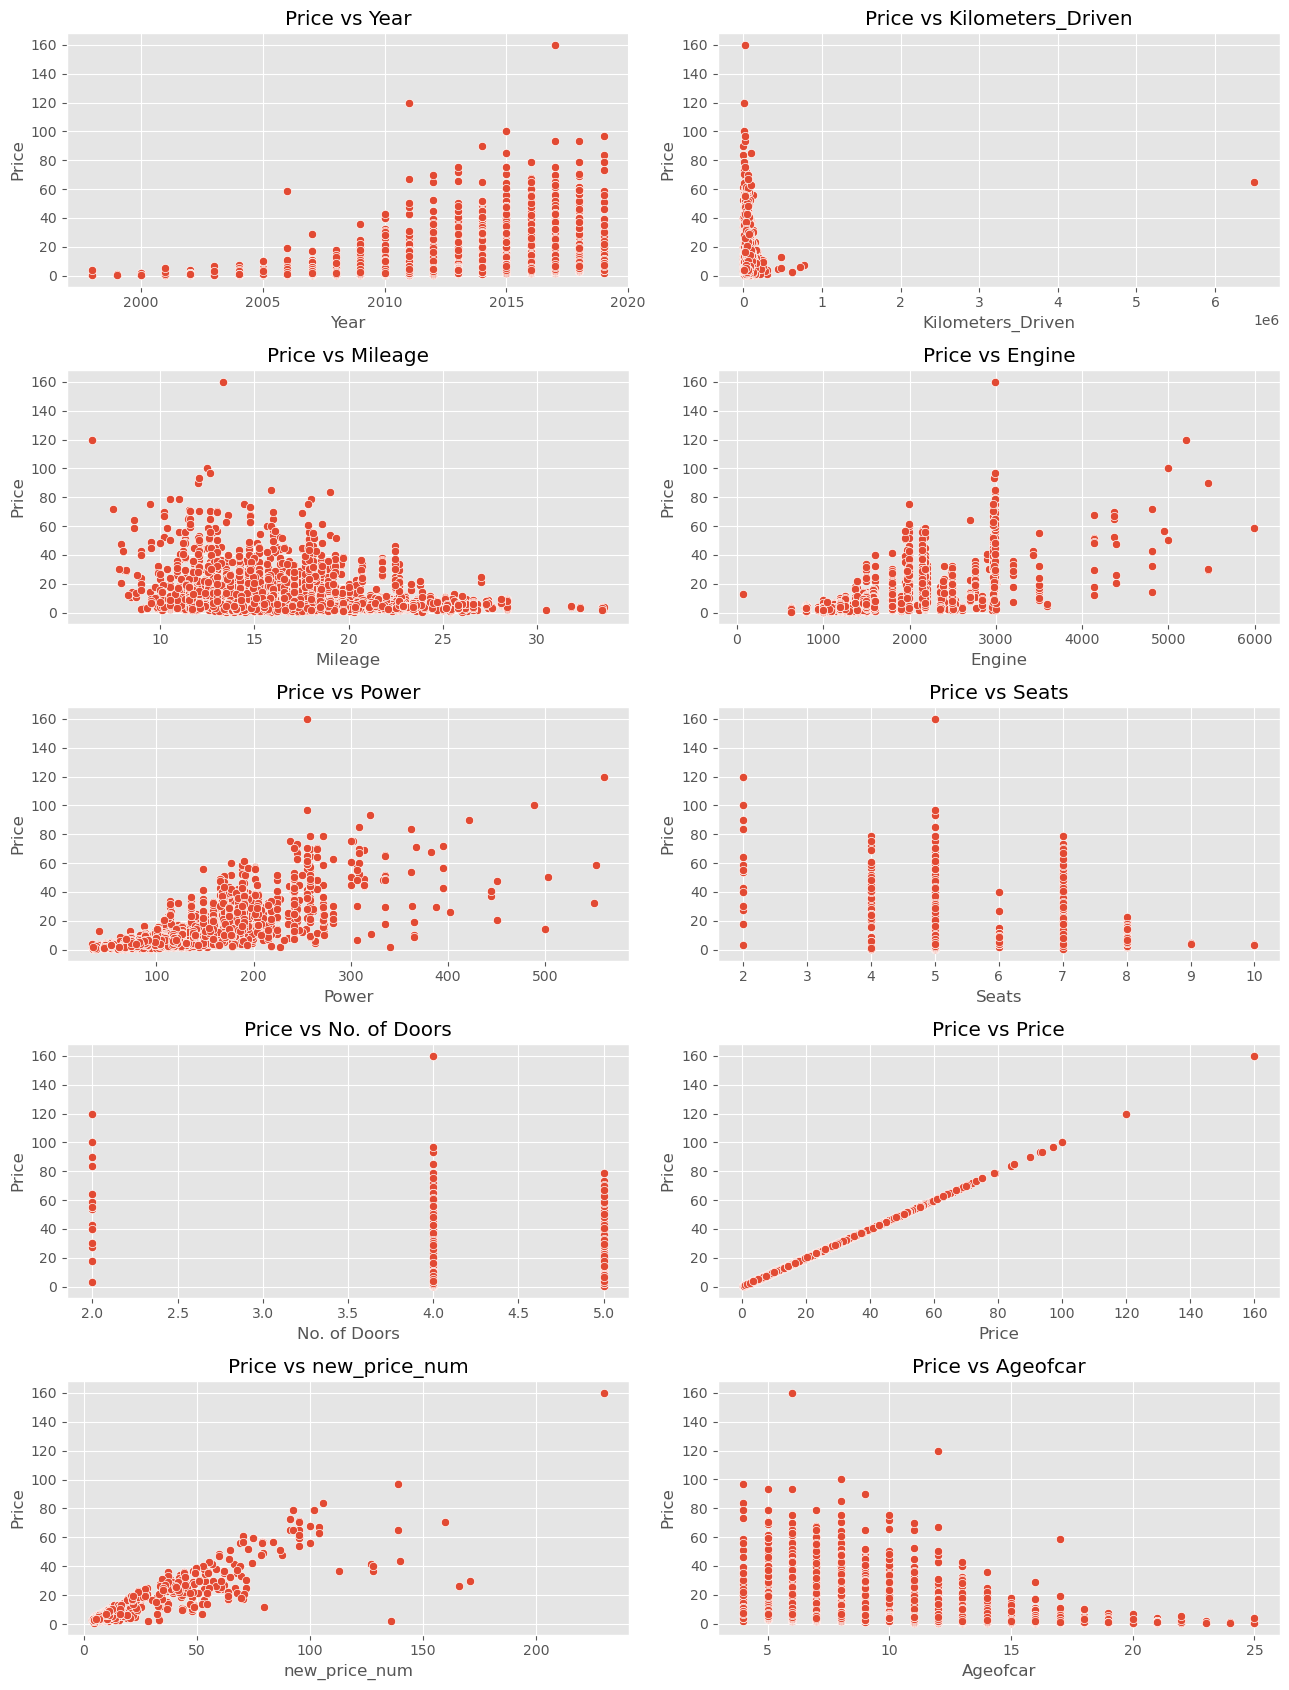

In [42]:
numeric_columns= numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars[variable],y=cars['Price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

## Handling Missing Values

In [43]:
cars.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                58
Engine                 17
Power                 135
Colour                 11
Seats                   0
No. of Doors            1
New_Price            5137
Price                   0
new_price_num        5137
Ageofcar                2
Brand                   0
Model                   0
dtype: int64

In [44]:
col = ['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      17
Power      135
Mileage     58
dtype: int64

We can start filling missing values by grouping name and year and fill in missing values. with median.

In [45]:
cars.groupby(['Name','Year'])['Engine'].median().head(30)

Name     Year      
Audi A3  2014.00000   1968.00000
         2016.00000   1968.00000
         2017.00000   1968.00000
Audi A4  2008.00000   1968.00000
         2009.00000   1968.00000
         2010.00000   1968.00000
         2011.00000   1968.00000
         2012.00000   1968.00000
         2013.00000   1968.00000
         2014.00000   1968.00000
         2015.00000   1968.00000
         2016.00000   1968.00000
         2017.00000   1681.50000
         2019.00000   1968.00000
Audi A6  2008.00000   2967.00000
         2009.00000   2832.50000
         2010.00000   2698.00000
         2011.00000   2832.50000
         2012.00000   1968.00000
         2013.00000   1968.00000
         2014.00000   1968.00000
         2015.00000   1968.00000
         2016.00000   1891.00000
         2017.00000   1968.00000
         2018.00000   1883.00000
Audi A7  2011.00000   2967.00000
         2012.00000   2967.00000
         2014.00000   2967.00000
Audi A8  2009.00000   2967.00000
         2012.00000   2

In [46]:
cars['Engine']=cars.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
cars['Power']=cars.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
cars['Mileage']=cars.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [47]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine      3
Power      39
Mileage    19
dtype: int64

In [48]:
cars.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand  Model
Audi   A3      1968.00000
       A4      1968.00000
       A6      1968.00000
       A7      2967.00000
       A8      2967.00000
       Q3      1968.00000
       Q5      1968.00000
       Q7      2967.00000
       RS5     2894.00000
       TT      1984.00000
Name: Engine, dtype: float64

As we can see most of the model have same engine size and instead of just applying median , grouping with model and year that should give me more granularity, and near to accurate Engine values.

In [49]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model and year to get  more granularity and more accurate Engine and then fillig with median
cars['Engine']=cars.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))

In [50]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate Engine
cars['Power']=cars.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [51]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate Engine
cars['Mileage']=cars.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [52]:
col=['Engine','Power','Mileage']
cars[col].isnull().sum()

Engine     0
Power      8
Mileage    9
dtype: int64

There are still missing values , analyzing further .Grouping by only Model for Engine and then filling missing values with median. For Power and Mileage Engine values for a Brand can be used to get more accurate value.

In [53]:
cars.groupby(['Model','Year'])['Engine'].agg({'median','mean','max'}).sort_values(by='Model',ascending=True).head(10)

median        max       mean
Model Year                                       
1     2013.00000 1995.00000 1995.00000 1995.00000
      2015.00000 1995.00000 1995.00000 1995.00000
1000  1998.00000  970.00000  970.00000  970.00000
3     2019.00000 1995.00000 1995.00000 1995.00000
      2018.00000 1995.00000 1995.00000 1995.00000
      2017.00000 1995.00000 1995.00000 1995.00000
      2016.00000 1995.00000 1995.00000 1995.00000
      2014.00000 1995.00000 2993.00000 2105.88889
      2013.00000 1995.00000 2993.00000 2066.42857
      2015.00000 1995.00000 1995.00000 1995.00000

In [54]:
cars.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

median       max      mean
Brand Engine                                  
Audi  1395.00000 147.51000 147.51000 147.51000
      1781.00000 163.20000 163.20000 163.20000
      1798.00000 187.74000 187.74000 181.03333
      1968.00000 174.33000 187.74000 166.95412
      1984.00000 207.80000 226.60000 192.69250
      2698.00000 179.50000 179.50000 179.50000
      2773.00000 201.00000 201.00000 201.00000
      2894.00000 444.00000 444.00000 444.00000
      2967.00000 241.40000 246.70000 241.77462
      3197.00000 140.80000 140.80000 140.80000

Need to analyse along with price if seats plays any role in price

In [55]:
cars["Location"] = cars["Location"].astype("category")
cars['Brand'] =cars['Brand'].astype("category")

In [56]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5961 non-null   object  
 1   Location           5950 non-null   category
 2   Year               5959 non-null   float64 
 3   Kilometers_Driven  5953 non-null   float64 
 4   Fuel_Type          5961 non-null   category
 5   Transmission       5934 non-null   category
 6   Owner_Type         5946 non-null   category
 7   Mileage            5952 non-null   float64 
 8   Engine             5961 non-null   float64 
 9   Power              5953 non-null   float64 
 10  Colour             5950 non-null   object  
 11  Seats              5961 non-null   float64 
 12  No. of Doors       5960 non-null   float64 
 13  New_Price          824 non-null    object  
 14  Price              5961 non-null   float64 
 15  new_price_num      824 non-null    float64 
 16  Ageofc

### Processing New Price

In [57]:
#For better granualarity grouping has there would be same car model present so filling with a median value brings it more near to real value
cars['new_price_num']=cars.groupby(['Name','Year'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [58]:
cars.new_price_num.isnull().sum()

3114

In [59]:
cars['new_price_num']=cars.groupby(['Name'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [60]:
cars.new_price_num.isnull().sum()

1256

In [61]:
cars['new_price_num']=cars.groupby(['Brand'])['new_price_num'].apply(lambda x:x.fillna(x.median()))

In [62]:
cars.new_price_num.isnull().sum()

119

In [63]:
cars.drop(['New_Price'],axis=1,inplace=True)

In [64]:
cars.groupby(['Brand'])['new_price_num'].median().sort_values(ascending=False)

Brand
Land Rover      139.00000
Porsche         136.00000
Jaguar           72.64000
BMW              56.55000
Audi             53.14000
Mercedes-Benz    49.49000
Volvo            45.67000
Mini Cooper      42.12000
Mitsubishi       33.84500
Isuzu            33.68000
Skoda            28.37000
Toyota           23.53500
Jeep             23.19000
Mahindra         16.40000
Renault          15.01000
Ford             11.89000
Honda            11.85000
Nissan           11.33000
Volkswagen       10.32000
Hyundai           9.74000
Fiat              9.50000
Maruti            7.89500
Tata              7.77000
Datsun            5.44000
Bentley               NaN
Chevrolet             NaN
Force                 NaN
Lamborghini           NaN
Smart                 NaN
Name: new_price_num, dtype: float64

In [65]:
cars.isnull().sum()

Name                   0
Location              11
Year                   2
Kilometers_Driven      8
Fuel_Type              0
Transmission          27
Owner_Type            15
Mileage                9
Engine                 0
Power                  8
Colour                11
Seats                  0
No. of Doors           1
Price                  0
new_price_num        119
Ageofcar               2
Brand                  0
Model                  0
dtype: int64

In [66]:
cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    cars[ii] = cars[ii].fillna(cars[ii].median())

In [67]:
#dropping remaining rows
#cannot further fill this rows so dropping them

cars.dropna(inplace=True,axis=0)

In [68]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
new_price_num        0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [69]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,new_price_num,Ageofcar,Brand,Model
0,Mahindra Scorpio,Pune,2012.00000,99000.00000,Diesel,Manual,Third,12.05000,2179.00000,120.00000,Black/Silver,8.00000,5.00000,6.00000,16.40000,11.00000,Mahindra,Scorpio
1,Maruti Baleno,Kochi,2018.00000,18678.00000,Petrol,Manual,First,21.10000,998.00000,100.00000,Others,5.00000,4.00000,8.32000,10.05500,5.00000,Maruti,Baleno
2,Mahindra Xylo,Bangalore,2013.00000,197000.00000,Diesel,Manual,First,11.68000,2498.00000,112.00000,White,7.00000,5.00000,4.00000,11.67000,10.00000,Mahindra,Xylo
3,Hyundai Grand,Delhi,2014.00000,45000.00000,Diesel,Manual,First,24.00000,1120.00000,70.00000,White,5.00000,4.00000,3.49000,7.77500,9.00000,Hyundai,Grand
4,Toyota Innova,Delhi,2011.00000,65000.00000,Diesel,Manual,First,12.80000,2494.00000,102.00000,Others,8.00000,5.00000,6.40000,23.53500,12.00000,Toyota,Innova


In [70]:
cars.shape

(5790, 18)

Finally done with all missing values handling

### Bivariate & Multivariate Analysis

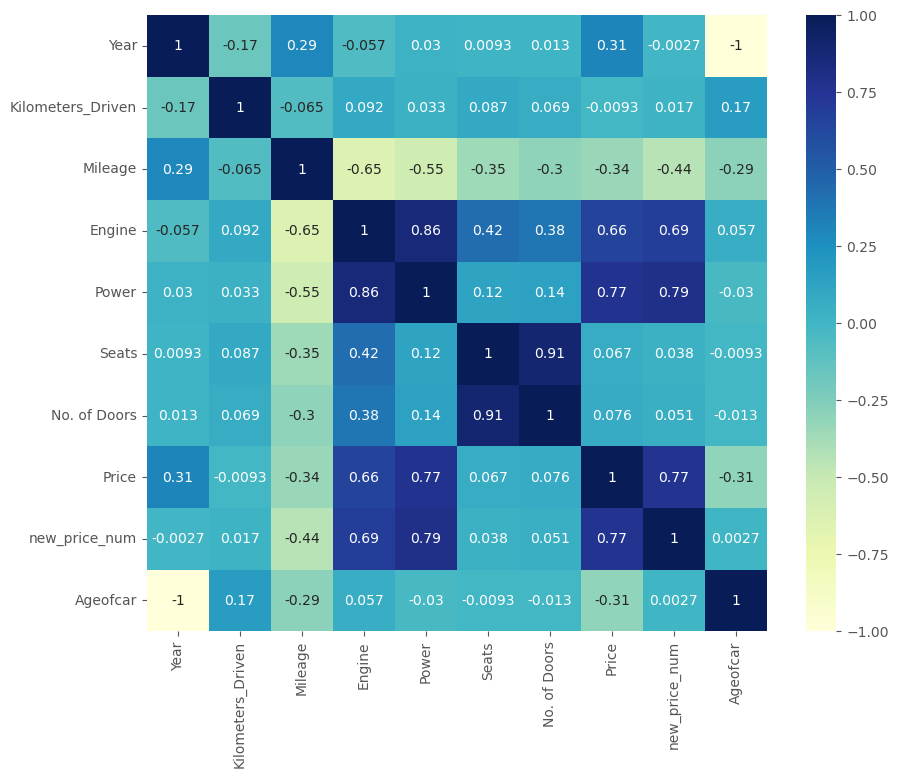

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(cars.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

### Observations

- Engine has strong positive correlation to Power [0.86].
- Price has positive correlation to Engine[0.66] as well Power [0.77].
- Mileage is negative correlated to Engine,Power,Price.,Ageofcar
- Price has negative correlation to age of car.
- Kilometer driven doesnt impact Price

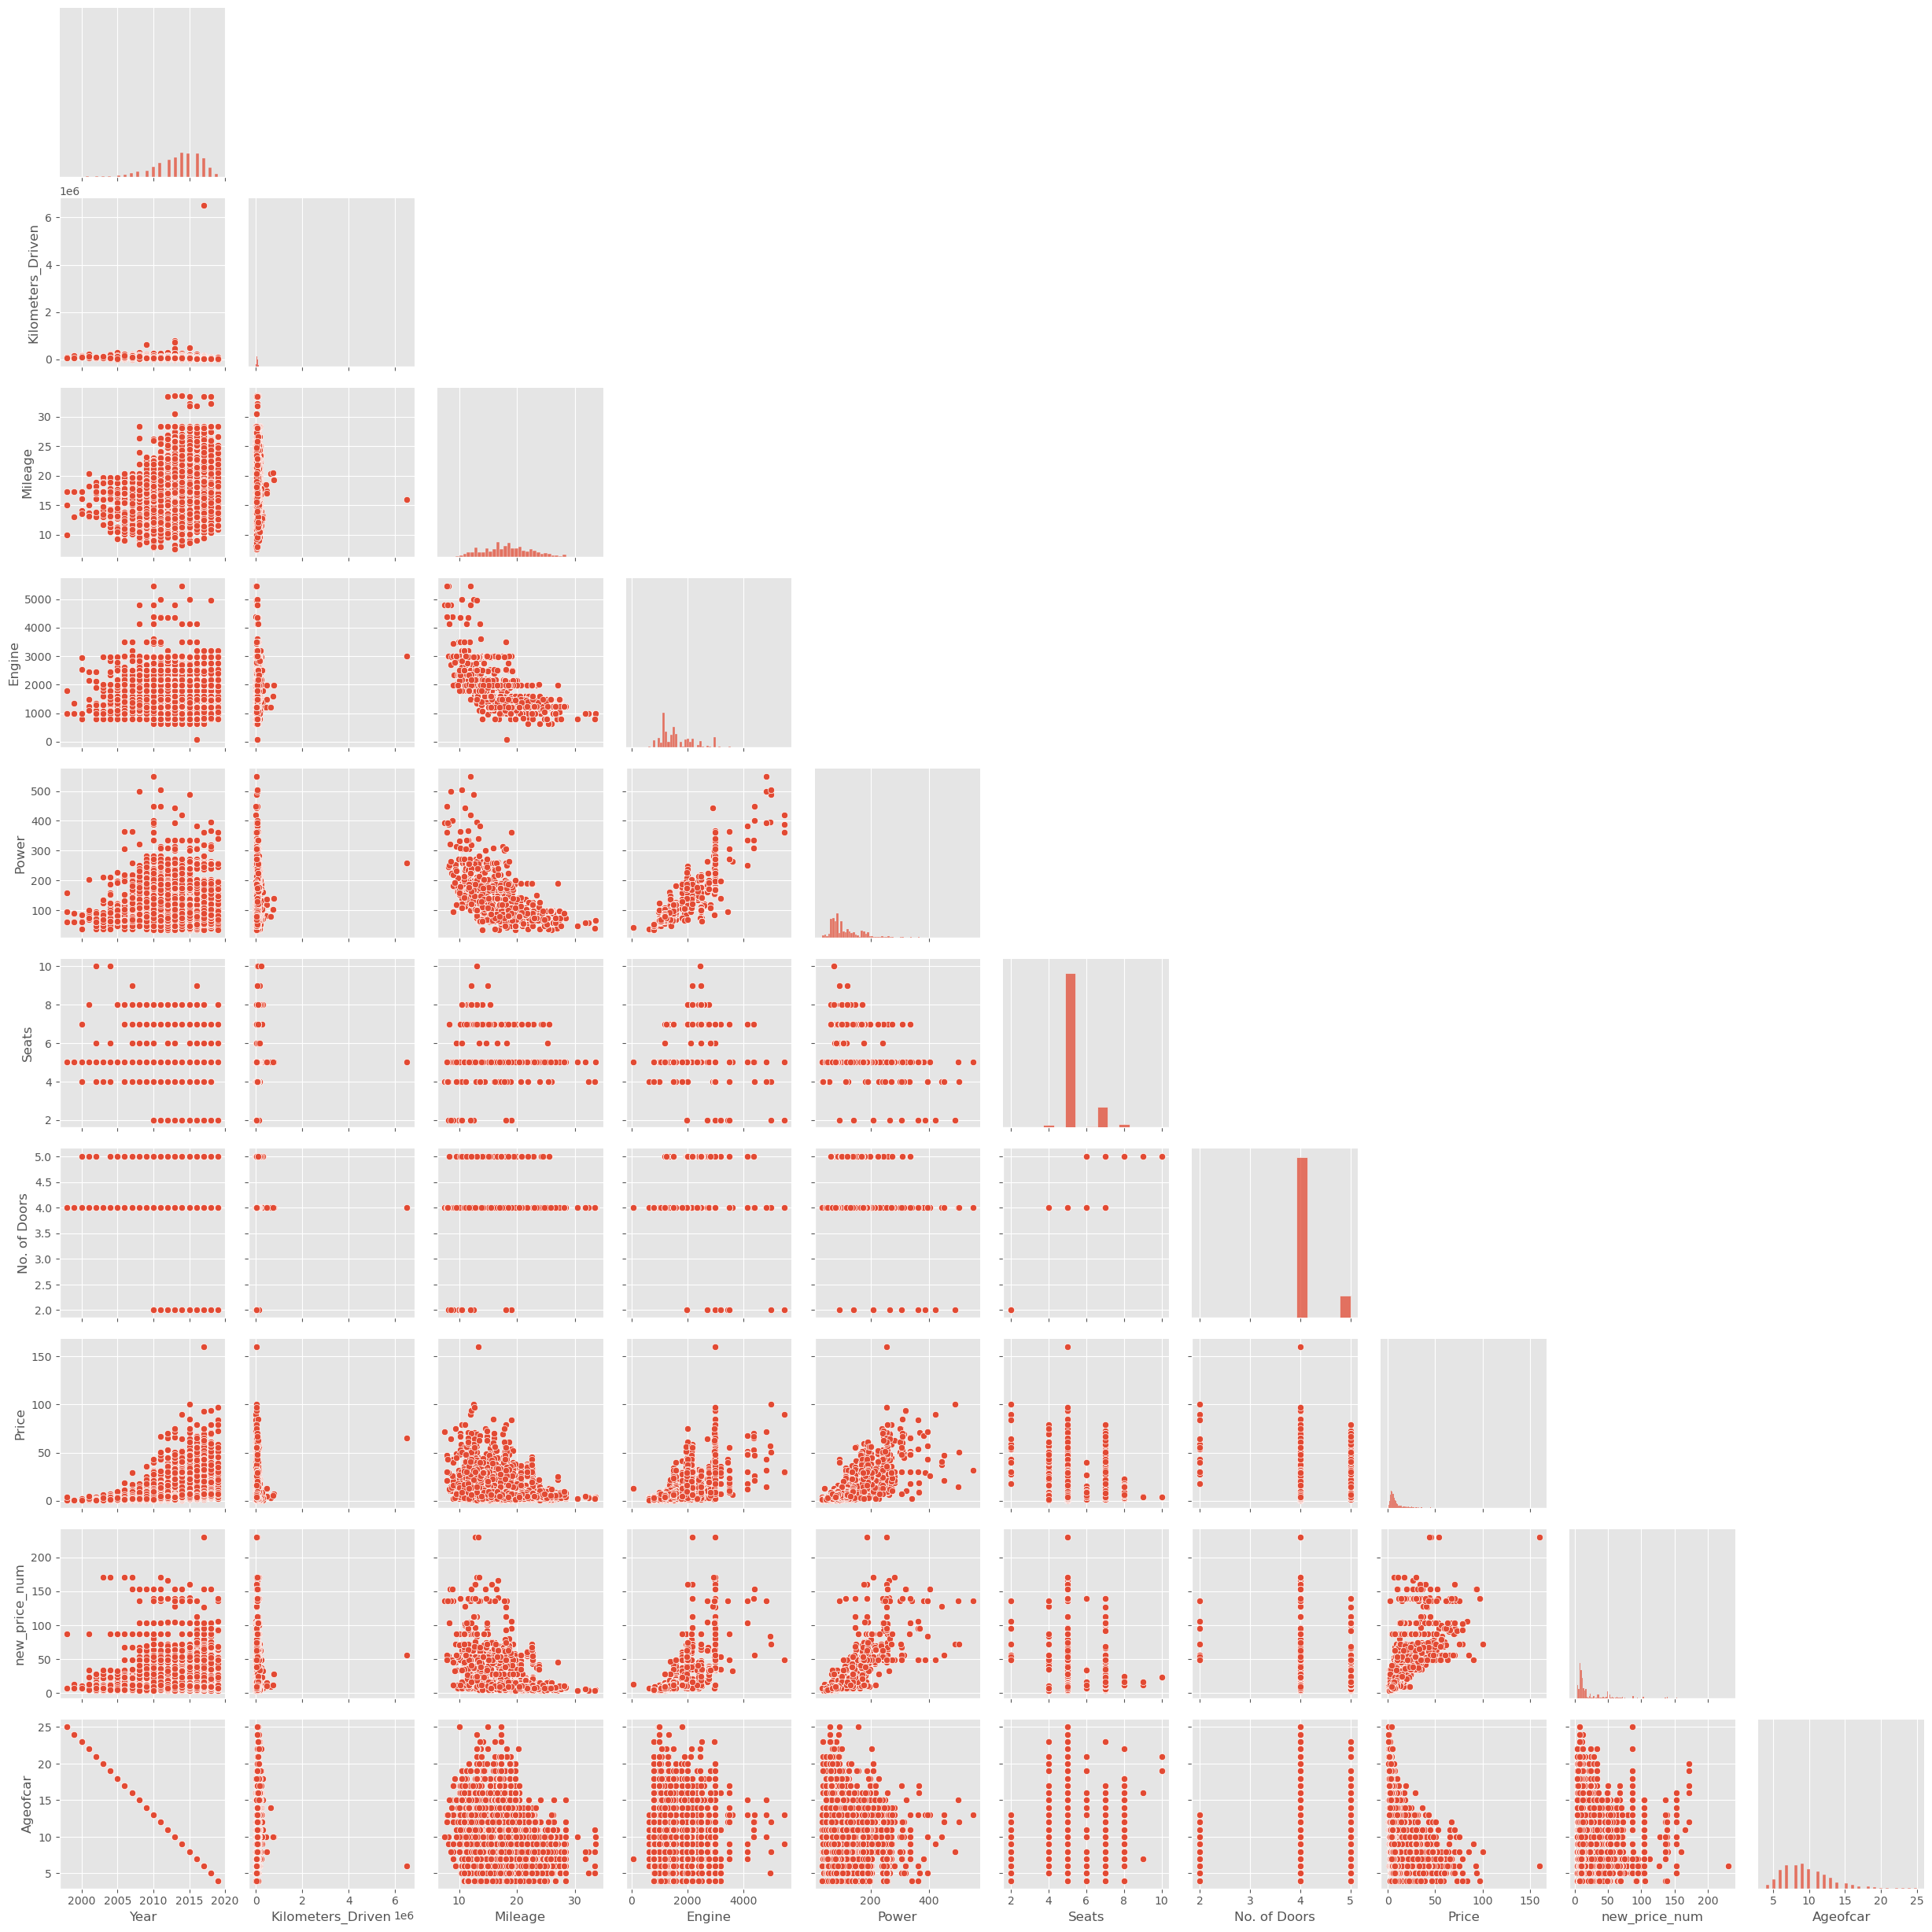

In [72]:
sns.pairplot(data=cars , corner=True)
plt.show()

### Observations

- Same observation about correlation as seen in heatmap.
- Kilometer driven doesnot have impact on Price .
- As power increase mileage decrease.
- Car with recent make sell at higher prices.
- Engine and Power increase , price of the car seems to increase.

#### Variables that are correlated with Price variable

<Axes: title={'center': 'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

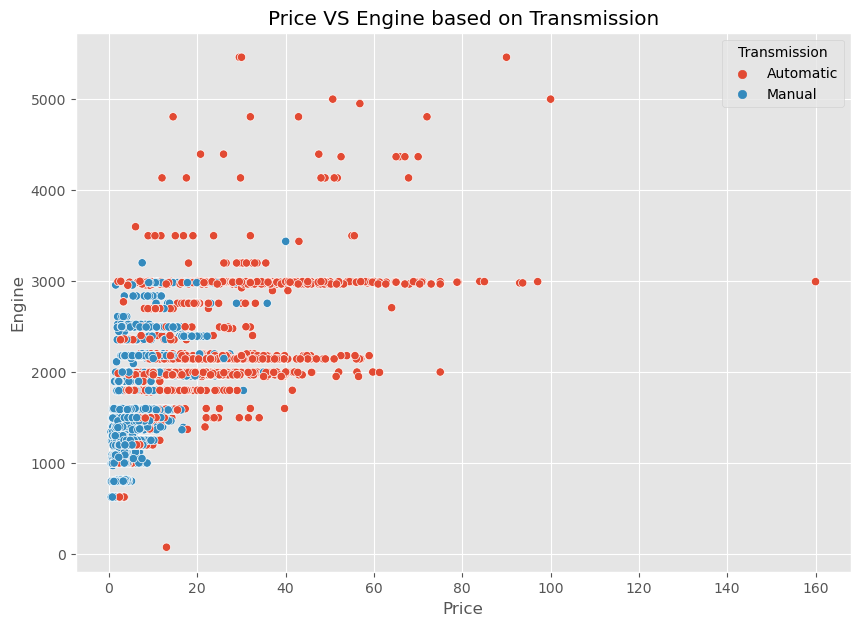

In [73]:
# Price VS Engine VS Transmission

plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=cars)

<Axes: title={'center': 'Price vs Power based on Transmission'}, xlabel='Price', ylabel='Power'>

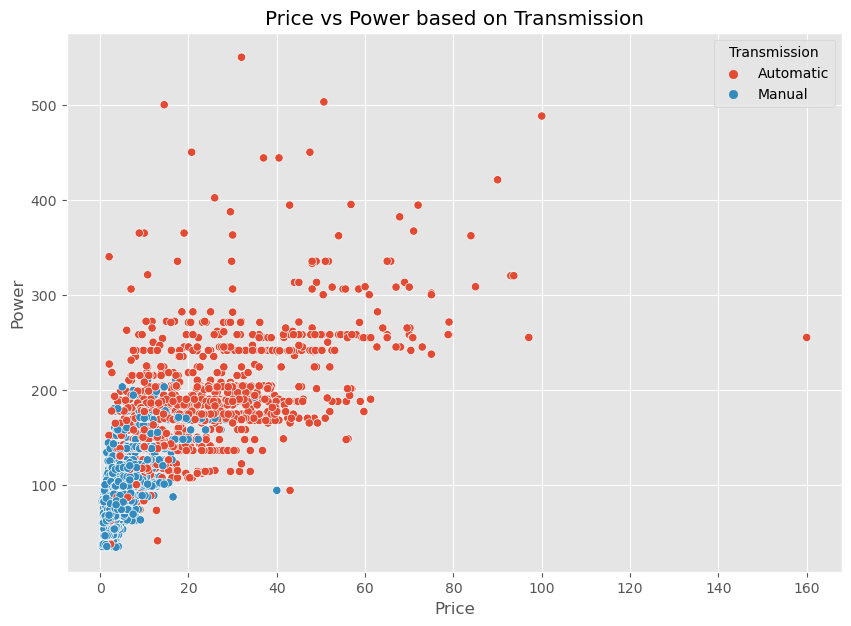

In [74]:
# Price VS Power VS Transmission

plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price', hue='Transmission', data=cars)

<Axes: xlabel='Price', ylabel='Mileage'>

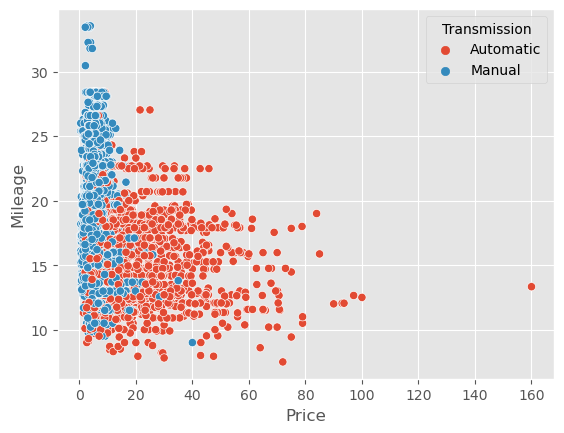

In [75]:
# Price VS Mileage VS Transmission

sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=cars)

<Axes: title={'center': 'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

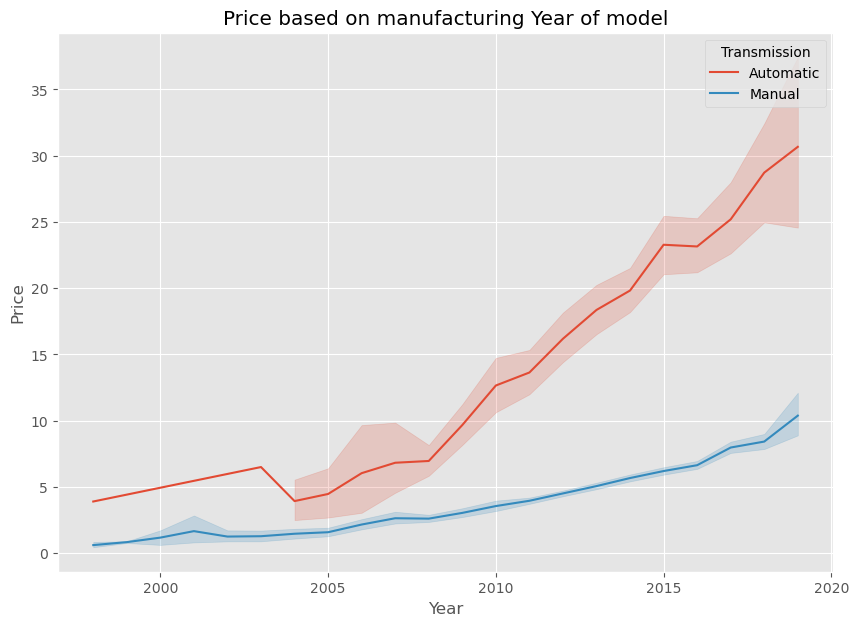

In [76]:
# Price VS Year VS Transmission

plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',data=cars)

<Axes: title={'center': 'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

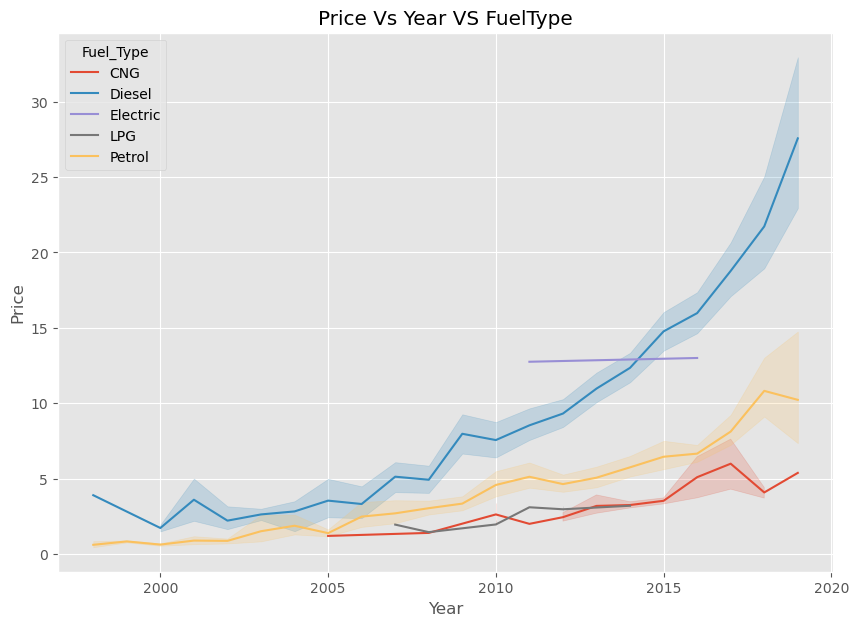

In [77]:
# Price VS Year VS Fuel Type

plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',
             data=cars)

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

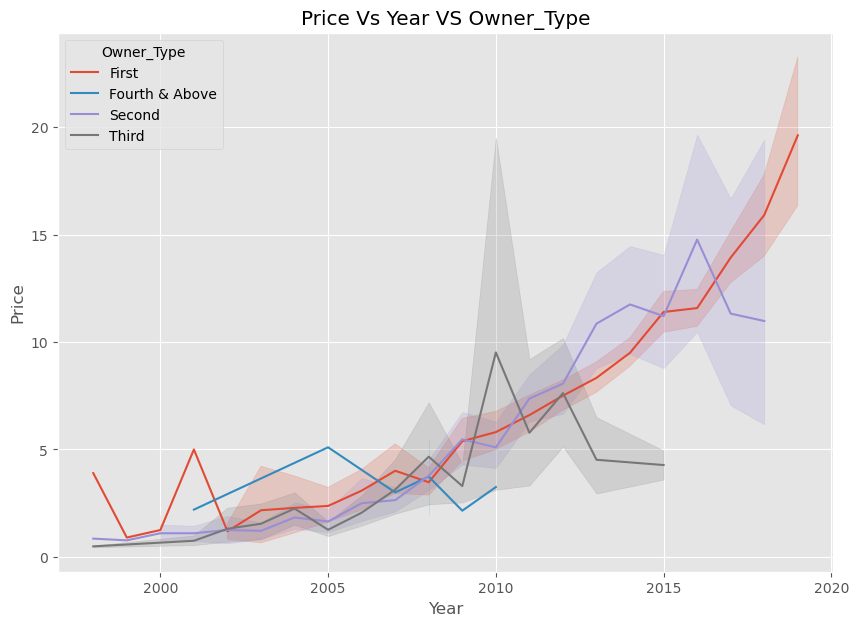

In [78]:
# Year VS Price VS Owner Type

plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',data=cars)

<Axes: title={'center': 'Price Vs Mileage'}, xlabel='Mileage', ylabel='Price'>

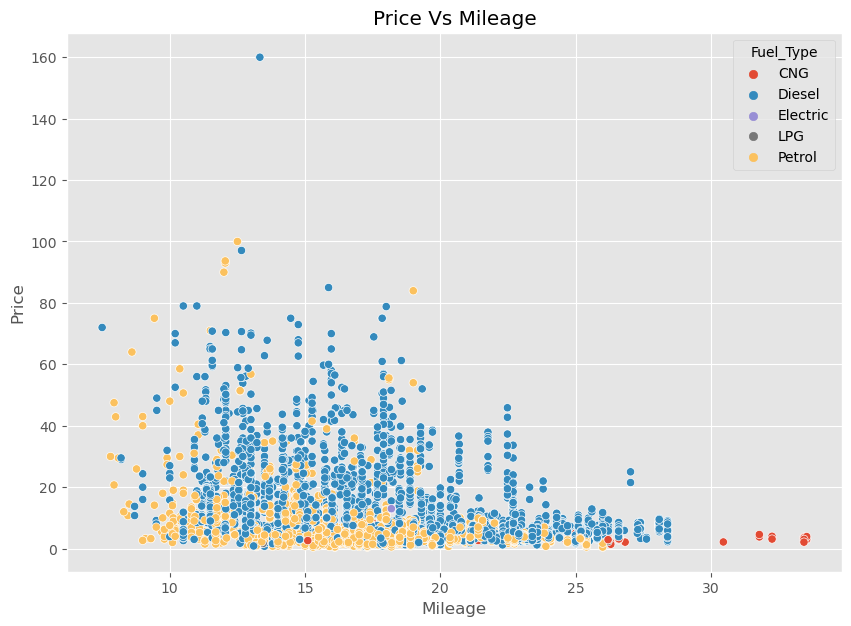

In [79]:
# Price VS Mileage VS Fuel Type

plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price', x='Mileage', hue='Fuel_Type', data=cars)

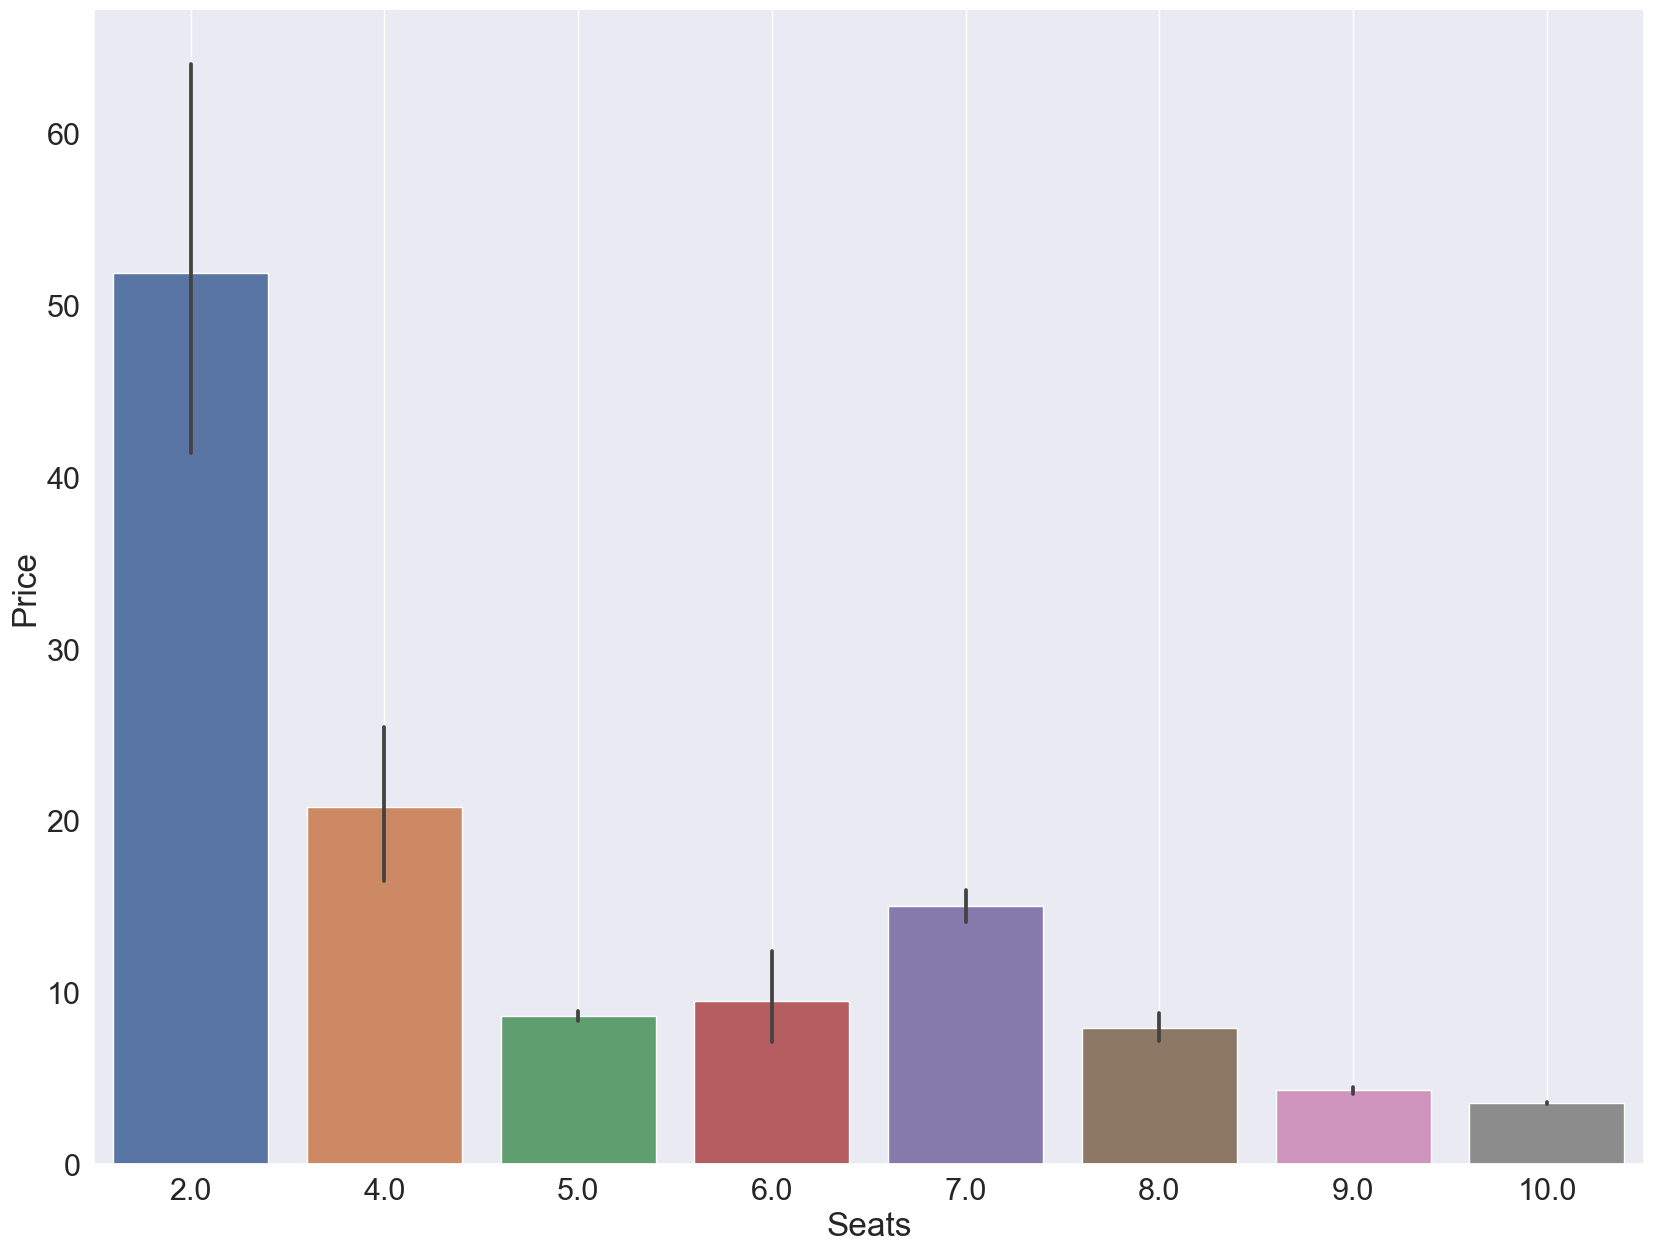

In [80]:
# Price VS Seats 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price', data=cars)
plt.grid()

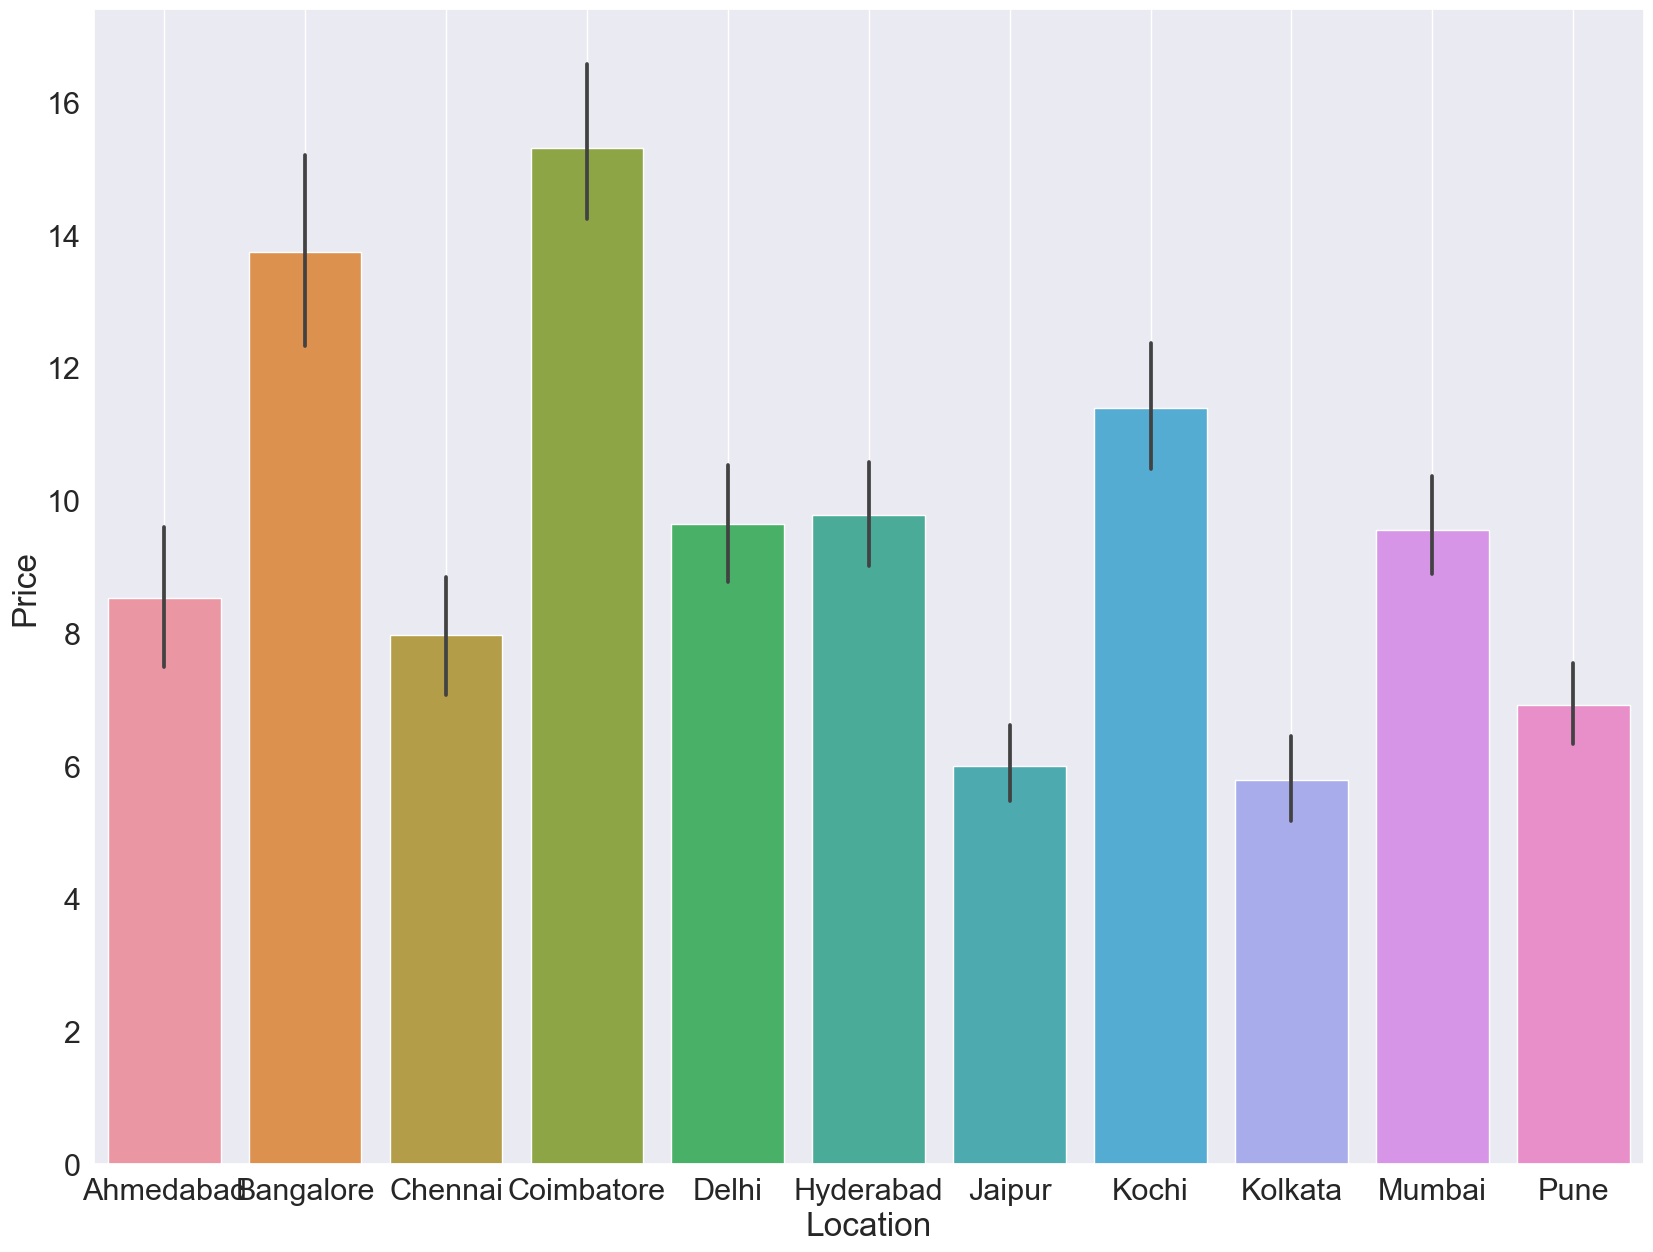

In [81]:
# Price VS Location 

plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price', data=cars)
plt.grid()

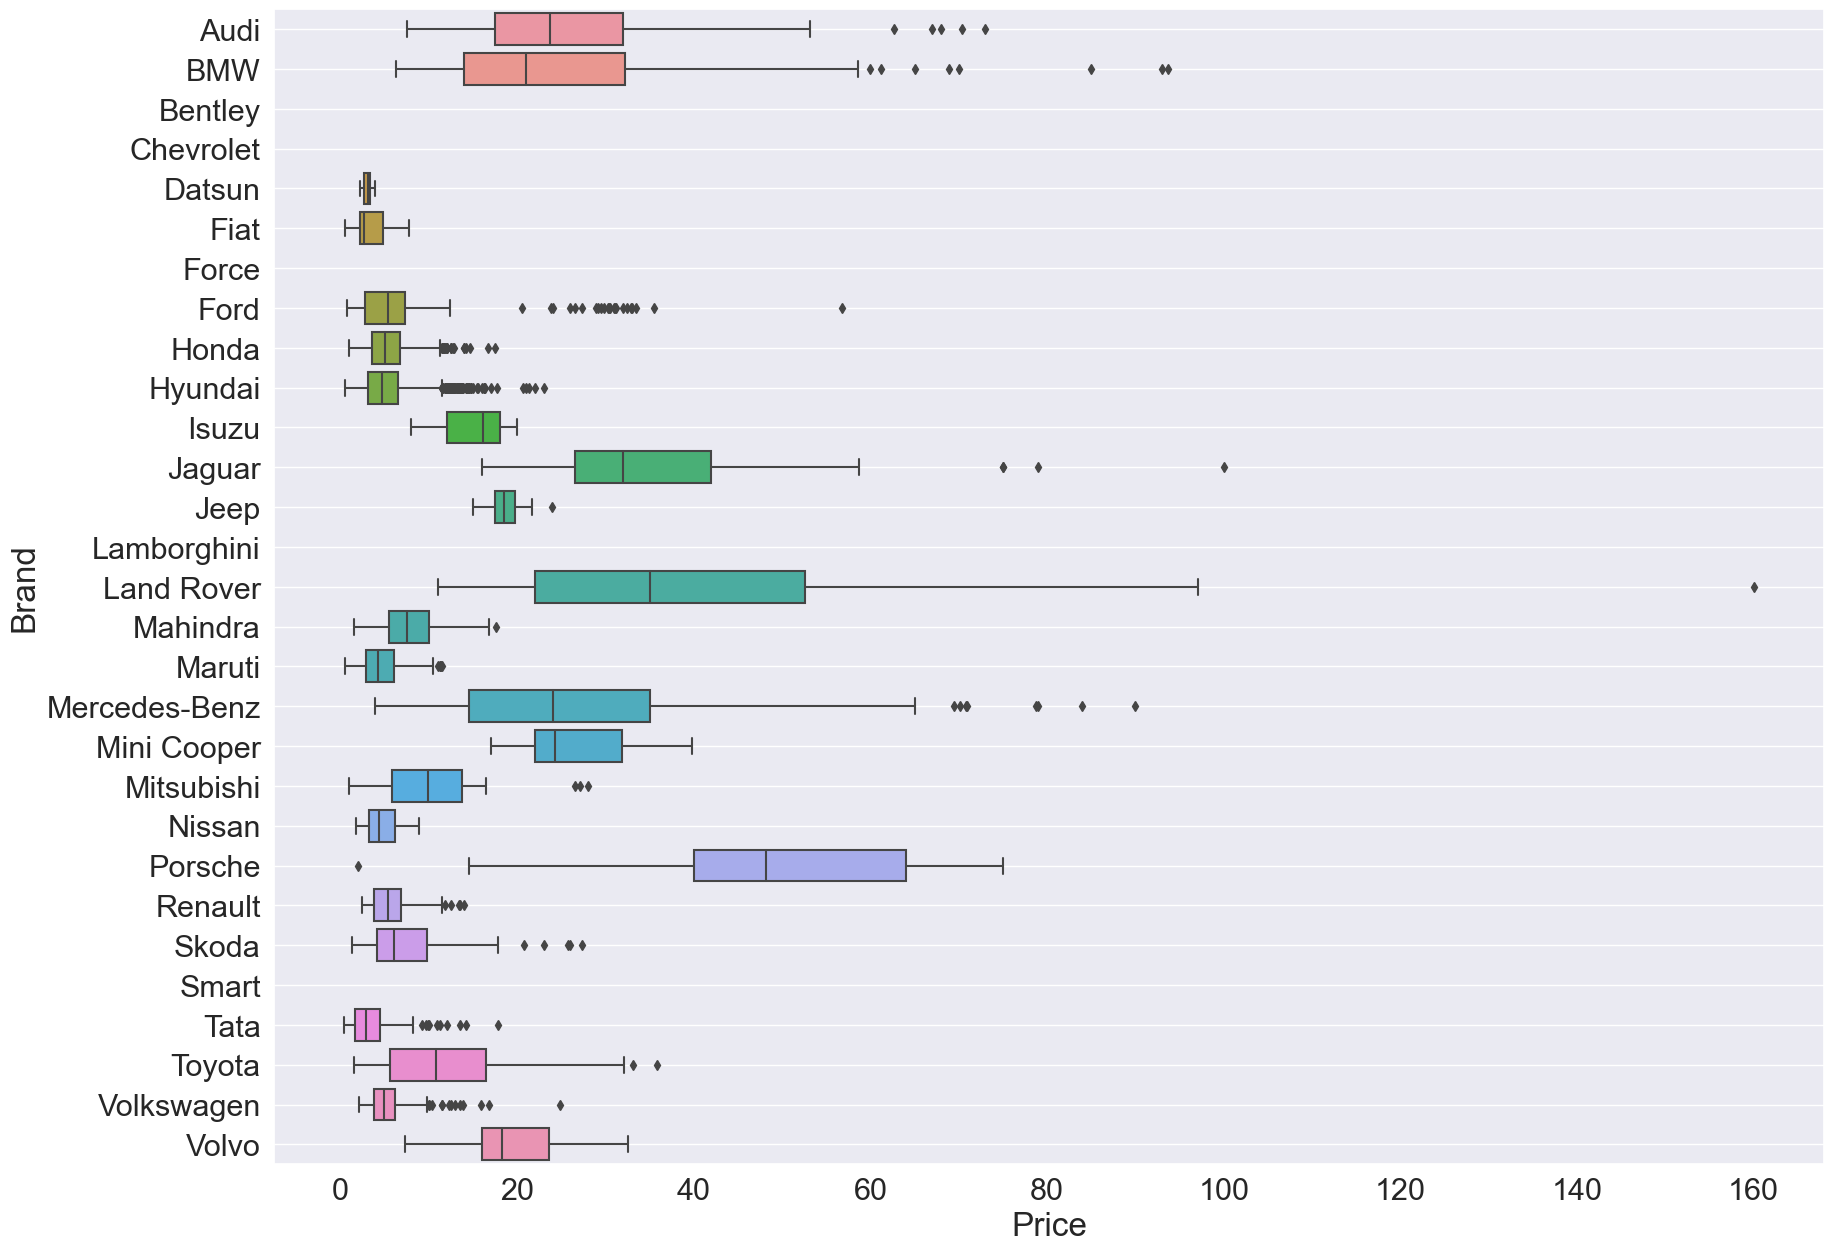

In [82]:
# Price VS Brand 

plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price', y='Brand', data=cars)
plt.grid()

## Insights based on EDA


### Observations

- Expensive cars are in Coimbatore and Banglore.
- 2 Seater cars are more expensive.
- Deisel Fuel type car are more expensive compared to other fuel type.
- As expected, Older model are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices.
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Deisel has increased with recent models
- Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

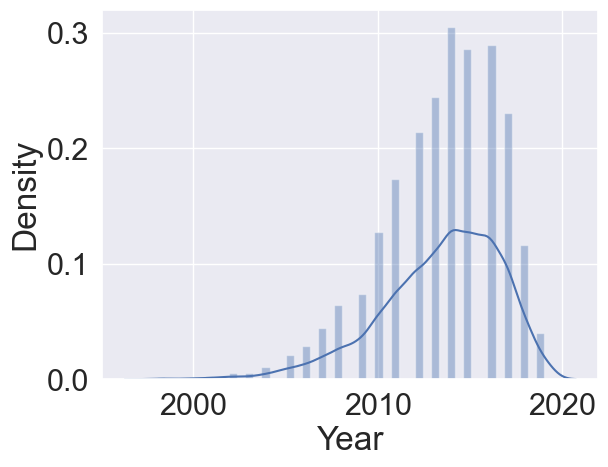

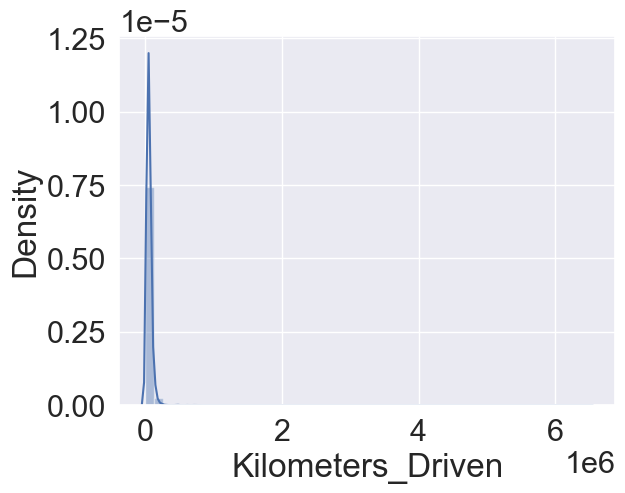

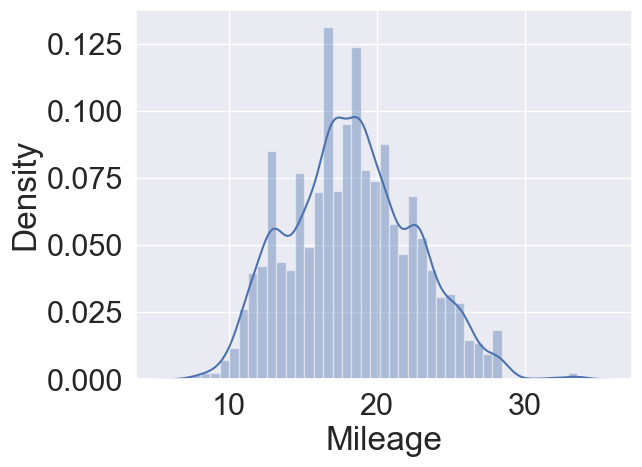

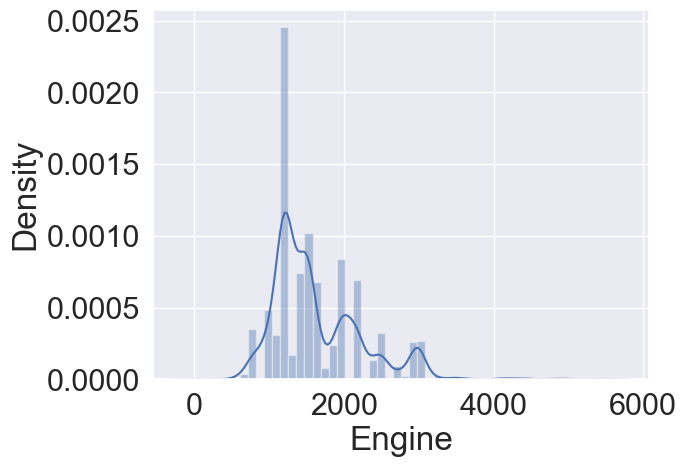

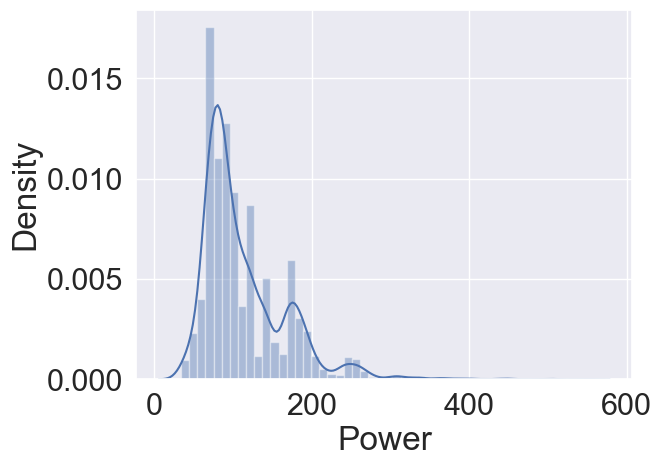

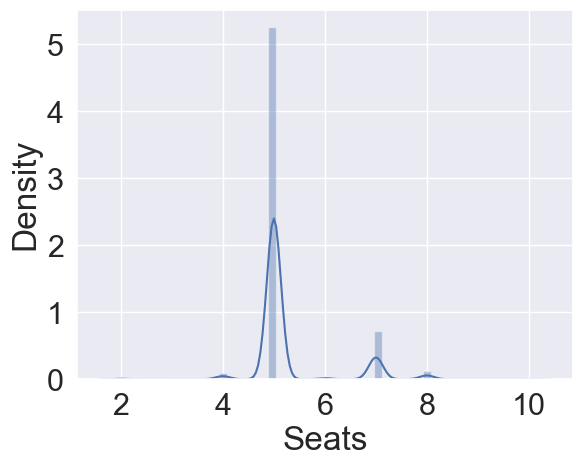

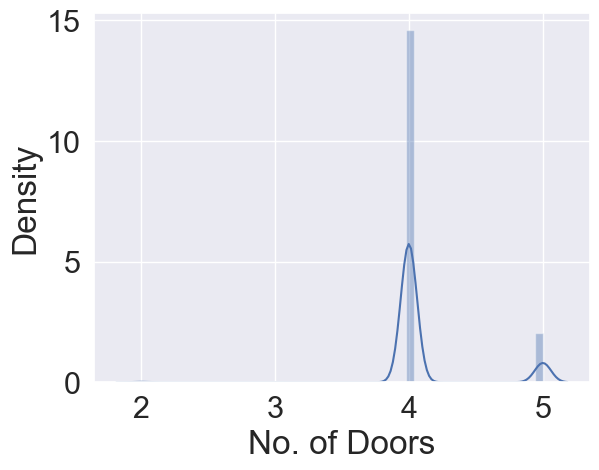

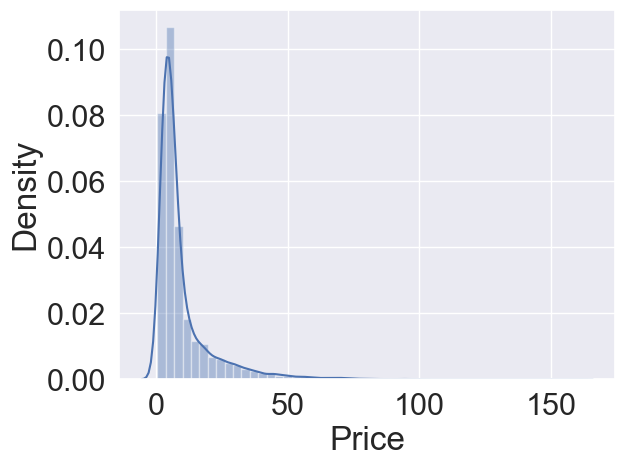

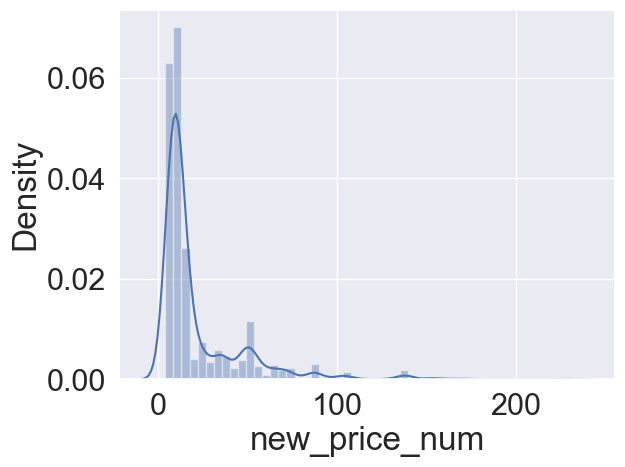

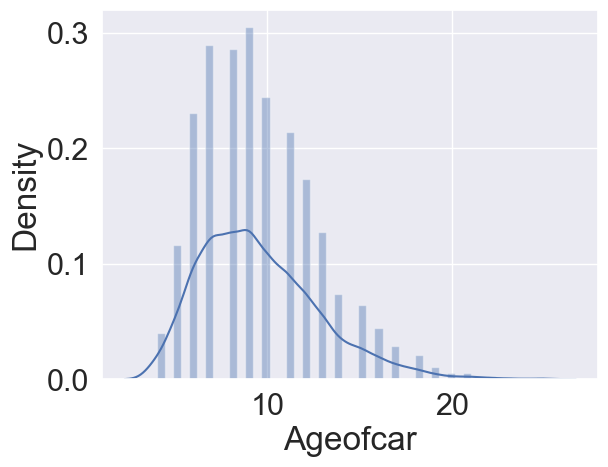

In [83]:
#check distribution if skewed. If the distribution is skewed, it is necessary to use log transform before model building
cols_to_log = cars.select_dtypes(include=np.number).columns.tolist()
for colname in cols_to_log:
    sns.distplot(cars[colname], kde=True)
    plt.show()

In [84]:
#since the distributions are right skewed, using log transform will help in normalization

def Perform_log_transform(df,col_log):
    "#Perform Log Transformation of dataframe , and list of columns"
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [85]:
Perform_log_transform(cars,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5790 entries, 0 to 5960
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   5790 non-null   object  
 1   Location               5790 non-null   category
 2   Year                   5790 non-null   float64 
 3   Kilometers_Driven      5790 non-null   float64 
 4   Fuel_Type              5790 non-null   category
 5   Transmission           5790 non-null   category
 6   Owner_Type             5790 non-null   category
 7   Mileage                5790 non-null   float64 
 8   Engine                 5790 non-null   float64 
 9   Power                  5790 non-null   float64 
 10  Colour                 5790 non-null   object  
 11  Seats                  5790 non-null   float64 
 12  No. of Doors           5790 non-null   float64 
 13  Price                  5790 non-null   float64 
 14  new_price_num          5790 non-null   f

In [86]:
cars.drop(['Name','Year','Brand','Model','new_price_num'],axis=1,inplace=True)

In [87]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5790 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               5790 non-null   category
 1   Kilometers_Driven      5790 non-null   float64 
 2   Fuel_Type              5790 non-null   category
 3   Transmission           5790 non-null   category
 4   Owner_Type             5790 non-null   category
 5   Mileage                5790 non-null   float64 
 6   Engine                 5790 non-null   float64 
 7   Power                  5790 non-null   float64 
 8   Colour                 5790 non-null   object  
 9   Seats                  5790 non-null   float64 
 10  No. of Doors           5790 non-null   float64 
 11  Price                  5790 non-null   float64 
 12  Ageofcar               5790 non-null   float64 
 13  Kilometers_Driven_log  5790 non-null   float64 
 14  Price_log              5790 non-null   f

## Model Building

In [88]:
X = cars.drop(['Price','Price_log'], axis=1)
Y = cars[['Price_log']]

Creating dummy variables

In [89]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x

In [90]:
#Dummy variable creation is done before spliting the data , so all the different categories are covered
#create dummy variable
X = encode_cat_vars(X)
X.head()

,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,Ageofcar,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Colour_Others,Colour_White
0,99000.00000,12.05000,2179.00000,120.00000,8.00000,5.00000,11.00000,11.50288,0,0,...,1,0,0,0,1,0,0,1,0,0
1,18678.00000,21.10000,998.00000,100.00000,5.00000,4.00000,5.00000,9.83510,0,0,...,0,0,0,1,1,0,0,0,1,0
2,197000.00000,11.68000,2498.00000,112.00000,7.00000,5.00000,10.00000,12.19096,1,0,...,1,0,0,0,1,0,0,0,0,1
3,45000.00000,24.00000,1120.00000,70.00000,5.00000,4.00000,9.00000,10.71442,0,0,...,1,0,0,0,1,0,0,0,0,1
4,65000.00000,12.80000,2494.00000,102.00000,8.00000,5.00000,12.00000,11.08214,0,0,...,1,0,0,0,1,0,0,0,1,0


In [91]:
#splitting the data in train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [92]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",Y_train.shape)
print("y_test:",Y_test.shape)

X_train: (4053, 28)
X_test: (1737, 28)
y_train: (4053, 1)
y_test: (1737, 1)


## Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
linReg = LinearRegression()

In [95]:
#training the model

linReg.fit(X_train,Y_train)

LinearRegression()

In [96]:
#testing the model
y_pred = linReg.predict(X_test)
y_pred

array([[1.70776204],
       [2.33037292],
       [2.62802183],
       ...,
       [1.44791111],
       [1.6516257 ],
       [2.35062235]])

In [97]:
#checking the accuracy

from sklearn.metrics import *
linReg_r2 = r2_score(Y_test,y_pred)
linReg_r2

0.8808504918972785

## Decision Tree Regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
dt = DecisionTreeRegressor()

In [100]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [101]:
y_dt_pred = dt.predict(X_test)
y_dt_pred

array([1.47017585, 2.74084002, 1.93874166, ..., 1.33500107, 1.97408103,
       1.82454929])

In [102]:
dt_r2 = r2_score(Y_test,y_dt_pred)
dt_r2

0.8660336350040325

## Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rf = RandomForestRegressor()

In [105]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [106]:
y_rf_pred = rf.predict(X_test)
y_rf_pred

array([1.47949591, 2.8298971 , 2.12540572, ..., 1.25887543, 1.86382624,
       1.9333706 ])

In [107]:
rf_r2 = r2_score(Y_test,y_rf_pred)
rf_r2

0.9248455539917294

## Comparing Models

In [108]:
print("The R-squared Score for Linear Regression Model is :", linReg_r2)
print("The R-squared Score for Decision Tree Regressor Model is :", dt_r2)
print("The R-squared Score for Random Forest Regressor Model is :", rf_r2)

The R-squared Score for Linear Regression Model is : 0.8808504918972785
The R-squared Score for Decision Tree Regressor Model is : 0.8660336350040325
The R-squared Score for Random Forest Regressor Model is : 0.9248455539917294


On comparision the best fitted model was Random Forest Regressor with the R-squared score of ~93%